#### Master Thesis 2024 - Diksha Acharya
# 3- Analysis and Descriptive statistics T° and RH on daily data
 
---
3.1 - Imports and tables


In [47]:
# Import 
import geopandas as gpd
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.colors as mcolors
import cartopy.feature as cfeature
import os
from shapely.geometry import Point
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns

In [48]:
# Indian states shapefile
shapefile_path = "Indian_States"
Indian_states = gpd.read_file(shapefile_path)

In [32]:
# State capitals data
capitals_df = pd.DataFrame({
    "State": [
        "Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chhattisgarh",
        "Goa", "Gujarat", "Haryana", "Himachal Pradesh","Jammu Kashmir", "Jharkhand",
        "Karnataka", "Kerala", "Madhya Pradesh", "Maharashtra", "Manipur",
        "Meghalaya", "Mizoram", "Nagaland", "Odisha", "Punjab",
        "Rajasthan", "Sikkim", "Tamil Nadu", "Telangana", "Tripura",
        "Uttar Pradesh", "Uttarakhand", "West Bengal"
    ],
    "Capital": [
        "Amaravati", "Itanagar", "Dispur", "Patna", "Raipur",
        "Panaji", "Gandhinagar", "Chandigarh", "Shimla", "Jammu", "Ranchi",
        "Bengaluru", "Thiruvananthapuram", "Bhopal", "Mumbai", "Imphal",
        "Shillong", "Aizawl", "Kohima", "Bhubaneswar", "Chandigarh",
        "Jaipur", "Gangtok", "Chennai", "Hyderabad", "Agartala",
        "Lucknow", "Dehradun", "Kolkata"
    ],
    "Latitude": [
        14.9062, 28.0844, 26.5438, 25.5941, 21.2514,
        15.4909, 23.2156, 29.5333, 32.1048, 34.5, 23.3441,
        13.9716, 8.9241, 23.2599, 19.0760, 24.8170,
        25.5788, 22.7271, 25.9751, 20.2961, 30.7333,
        26.9124, 27.3314, 11.0827, 17.3850, 23.8315,
        26.8467, 30.3165, 22.5726
    ],
    "Longitude": [
        79.6480, 93.6053, 91.7898, 85.1376, 81.6296,
        73.8317, 72.6369, 76.5794, 77.1734, 77, 85.3096,
        75.6946, 76.5366, 77.4126, 74.8777, 93.9368,
        91.8933, 92.7176, 94.1086, 84.8245, 75.7794,
        73.7873, 88.6065, 78.2707, 78.8867, 91.2868,
        80.9462, 79.2322, 88.3639
    ]
})

3.1.1 - T°, RH and HI 3h data

In [6]:
# 3h T file
file_T_3h = "India_T_3h_masked_C.nc"
T_3h = xr.open_dataset(file_T_3h)
T_3h

<xarray.Dataset>
Dimensions:    (time: 245448, longitude: 120, latitude: 124)
Coordinates:
  * time       (time) datetime64[ns] 1940-01-01 ... 2023-12-31T21:00:00
  * longitude  (longitude) float32 68.0 68.25 68.5 68.75 ... 97.25 97.5 97.75
  * latitude   (latitude) float32 38.0 37.75 37.5 37.25 ... 8.0 7.75 7.5 7.25
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Oct 16 17:32:30 2024: cdo -b F32 mergetime 1940_India_t...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [7]:
# 3h RH file
file_RH_3h = "India_RH_3h_masked_100.nc"
RH_3h = xr.open_dataset(file_RH_3h)
RH_3h

<xarray.Dataset>
Dimensions:    (time: 245448, latitude: 124, longitude: 120)
Coordinates:
  * time       (time) datetime64[ns] 1940-01-01 ... 2023-12-31T21:00:00
  * longitude  (longitude) float32 68.0 68.25 68.5 68.75 ... 97.25 97.5 97.75
  * latitude   (latitude) float32 38.0 37.75 37.5 37.25 ... 8.0 7.75 7.5 7.25
Data variables:
    r          (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Oct 17 21:23:40 2024: cdo -b F32 mergetime 1940_India_R...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [8]:
# 3h HI file
HI_3h_path = "Heat_Index_C_3h_final_with_adjustments.nc"
HI_3h = xr.open_dataset(HI_3h_path)
HI_3h 

<xarray.Dataset>
Dimensions:     (time: 245448, longitude: 120, latitude: 124)
Coordinates:
  * time        (time) datetime64[ns] 1940-01-01 ... 2023-12-31T21:00:00
  * longitude   (longitude) float32 68.0 68.25 68.5 68.75 ... 97.25 97.5 97.75
  * latitude    (latitude) float32 38.0 37.75 37.5 37.25 ... 8.0 7.75 7.5 7.25
Data variables:
    heat_index  (time, latitude, longitude) float32 ...

3.1.2 - T°, RH and HI daily data

In [2]:
# Daily T file
file_T_stat = "India_T_daily_stats.nc"
T_daily = xr.open_dataset(file_T_stat)
T_daily

<xarray.Dataset>
Dimensions:         (longitude: 120, latitude: 124, time: 30681)
Coordinates:
  * longitude       (longitude) float32 68.0 68.25 68.5 ... 97.25 97.5 97.75
  * latitude        (latitude) float32 38.0 37.75 37.5 37.25 ... 7.75 7.5 7.25
  * time            (time) datetime64[ns] 1940-01-01 1940-01-02 ... 2023-12-31
Data variables:
    daily_max_temp  (time, latitude, longitude) float32 ...
    daily_min_temp  (time, latitude, longitude) float32 ...
    daily_avg_temp  (time, latitude, longitude) float32 ...

In [3]:
# Daily RH file
file_RH_stat = "India_RH_daily_stats.nc"
RH_daily = xr.open_dataset(file_RH_stat)
RH_daily

<xarray.Dataset>
Dimensions:       (longitude: 120, latitude: 124, time: 30681)
Coordinates:
  * longitude     (longitude) float32 68.0 68.25 68.5 68.75 ... 97.25 97.5 97.75
  * latitude      (latitude) float32 38.0 37.75 37.5 37.25 ... 8.0 7.75 7.5 7.25
  * time          (time) datetime64[ns] 1940-01-01 1940-01-02 ... 2023-12-31
Data variables:
    daily_max_RH  (time, latitude, longitude) float32 ...
    daily_min_RH  (time, latitude, longitude) float32 ...
    daily_avg_RH  (time, latitude, longitude) float32 ...

In [4]:
# Daily HI file
file_HI_stat = "India_HI_adjustment_daily_stats.nc"
HI_daily = xr.open_dataset(file_HI_stat)
HI_daily

<xarray.Dataset>
Dimensions:       (longitude: 120, latitude: 124, time: 30681)
Coordinates:
  * longitude     (longitude) float32 68.0 68.25 68.5 68.75 ... 97.25 97.5 97.75
  * latitude      (latitude) float32 38.0 37.75 37.5 37.25 ... 8.0 7.75 7.5 7.25
  * time          (time) datetime64[ns] 1940-01-01 1940-01-02 ... 2023-12-31
Data variables:
    daily_max_HI  (time, latitude, longitude) float32 ...
    daily_min_HI  (time, latitude, longitude) float32 ...
    daily_avg_HI  (time, latitude, longitude) float32 ...

3.1.3 - 3h Data representation

In [9]:
# Compute time-averaged temperature
T_avg_data = T_3h['t2m'].sel(time=slice('1940-01-01', '2023-12-31')).mean(dim='time')

In [10]:
# colorbar extremes
print(T_avg_data.max().values)
print(T_avg_data.min().values)

29.206987380981445
-18.715974807739258


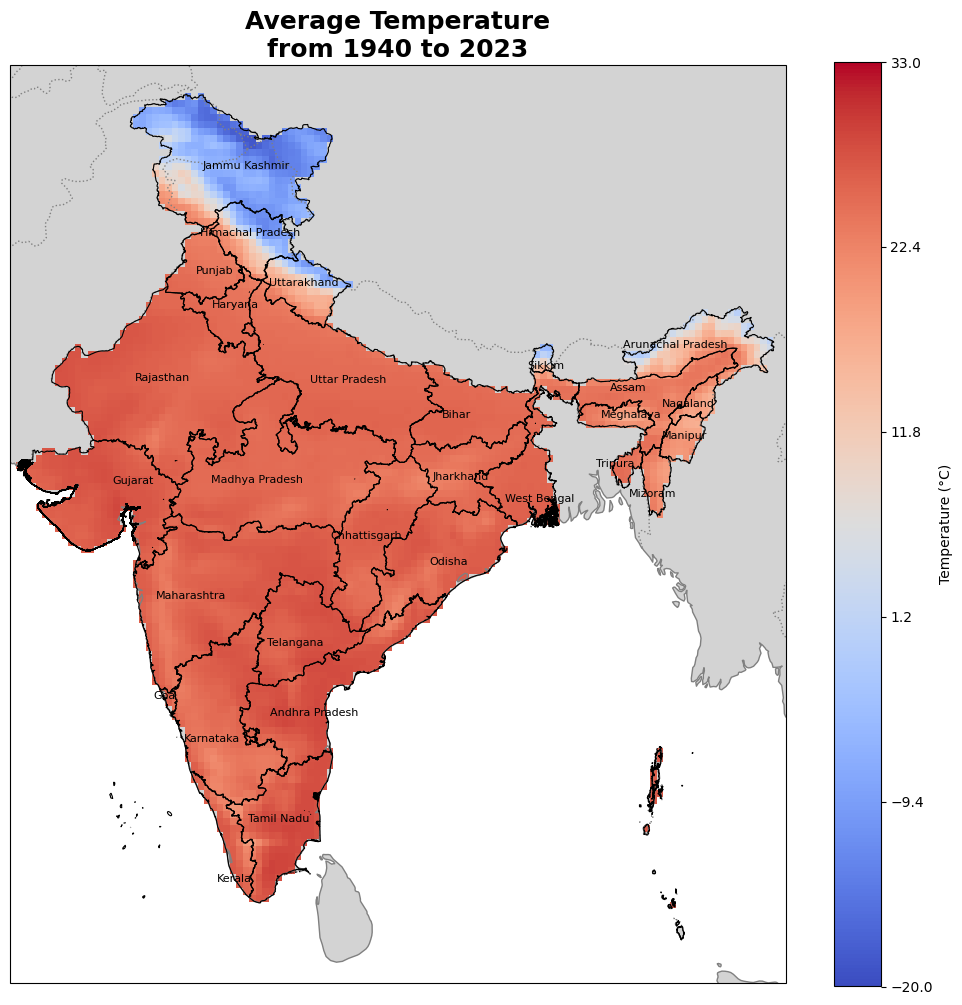

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Add Indian state boundaries
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Plot the masked data
T_avg_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=-20, vmax=33, cbar_kwargs={'label': 'Temperature (°C)','ticks': np.linspace(-20, 33, num=6)})

# Plot city points and labels
for _, row in capitals_df.iterrows():
    #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
    ax.text(row["Longitude"], row["Latitude"], row["State"],
            transform=ccrs.PlateCarree(), fontsize=8, color='black',
            horizontalalignment='center', verticalalignment='center', zorder=10)

# Title and labels
plt.title("Average Temperature\nfrom 1940 to 2023", fontsize=18, fontweight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Compute time-averaged RH
RH_avg_data = RH_3h['r'].sel(time=slice('1940-01-01', '2023-12-31')).mean(dim='time')

In [7]:
# Colorbar extremes
print(RH_avg_data.max().values)
print(RH_avg_data.min().values)

89.48054504394531
38.55363464355469


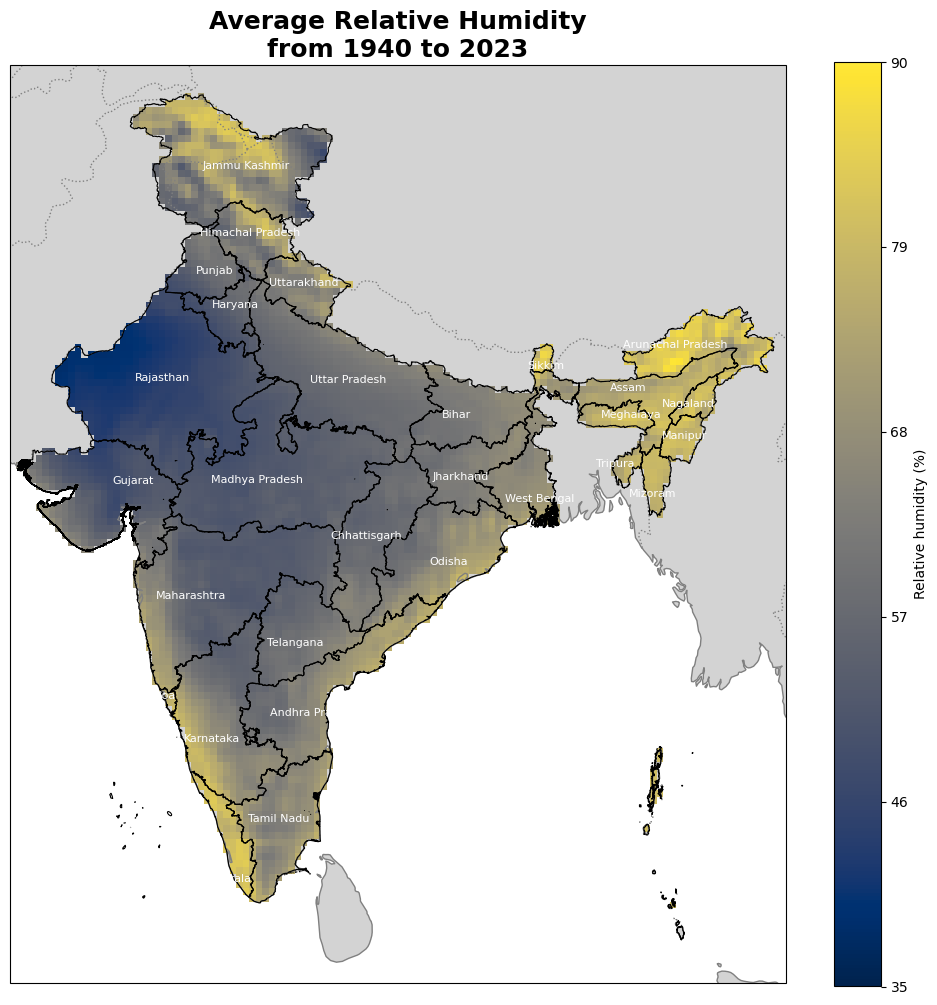

In [8]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Add Indian state boundaries
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Plot the masked data
RH_avg_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='cividis', vmin=35, vmax=90, cbar_kwargs={'label': 'Relative humidity (%)','ticks': np.linspace(35, 90, num=6)})

# Plot city points and labels
for _, row in capitals_df.iterrows():
    #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
    ax.text(row["Longitude"], row["Latitude"], row["State"],
            transform=ccrs.PlateCarree(), fontsize=8, color='white',
            horizontalalignment='center', verticalalignment='center', zorder=10)

# Title and labels
plt.title("Average Relative Humidity\nfrom 1940 to 2023", fontsize=18, fontweight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()

In [6]:
# Compute time-averaged heat index
HI_avg_data = HI_3h['heat_index'].sel(time=slice('1940-01-01', '2023-12-31')).mean(dim='time')

In [7]:
# Colorbar extremes
print(HI_avg_data.max().values)
print(HI_avg_data.min().values)

32.123897552490234
-0.0946265161037445


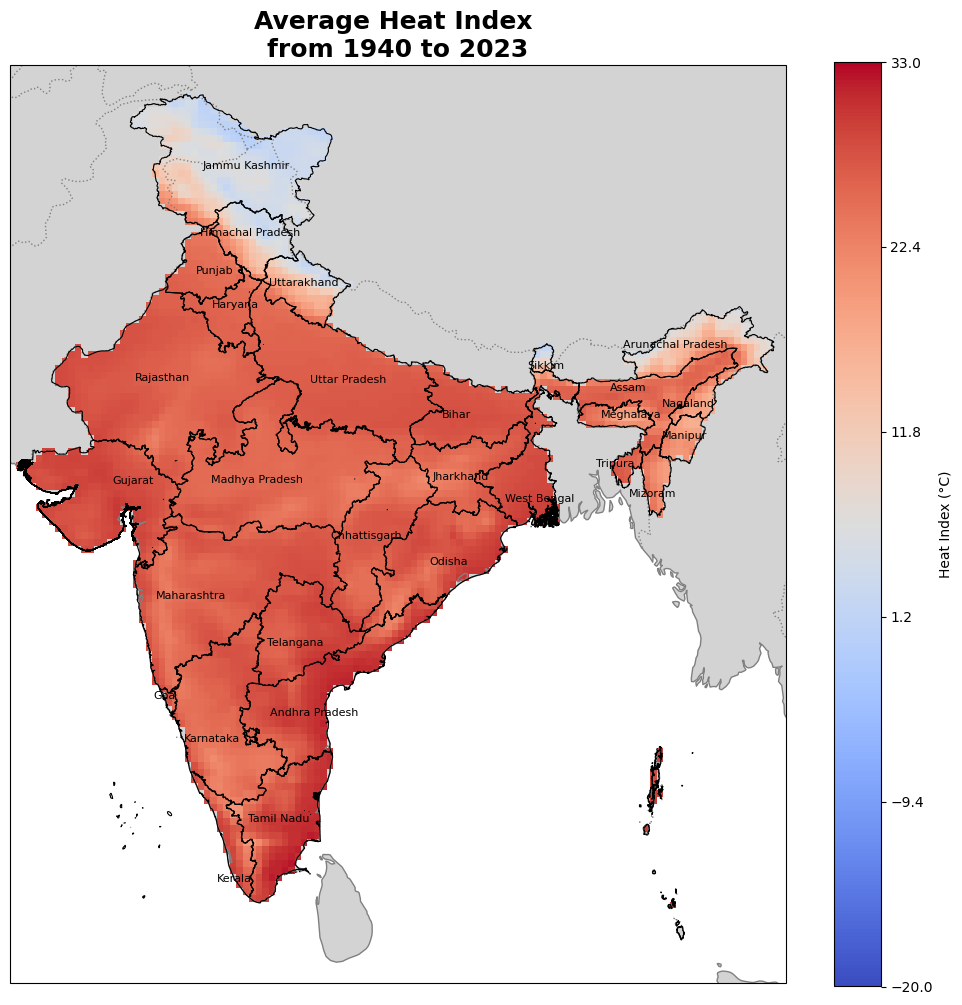

In [14]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Add Indian state boundaries
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Plot the masked data
HI_avg_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=-20, vmax=33, cbar_kwargs={'label': 'Heat Index (°C)','ticks': np.linspace(-20, 33, num=6)})

# Plot city points and labels
for _, row in capitals_df.iterrows():
    #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
    ax.text(row["Longitude"], row["Latitude"], row["State"],
            transform=ccrs.PlateCarree(), fontsize=8, color='black',
            horizontalalignment='center', verticalalignment='center', zorder=10)

# Title and labels
plt.title("Average Heat Index \nfrom 1940 to 2023", fontsize=18, fontweight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()

3.1.4 - Daily Average Data representation

In [ ]:
# Compute daily time-averaged T
T_daily_avg_data = T_daily['daily_avg_temp'].sel(time=slice('1940-01-01', '2023-12-31')).mean(dim='time')

In [12]:
# colorbar extremes
print(T_daily_avg_data.max().values)
print(T_daily_avg_data.min().values)

29.206985473632812
-18.715930938720703


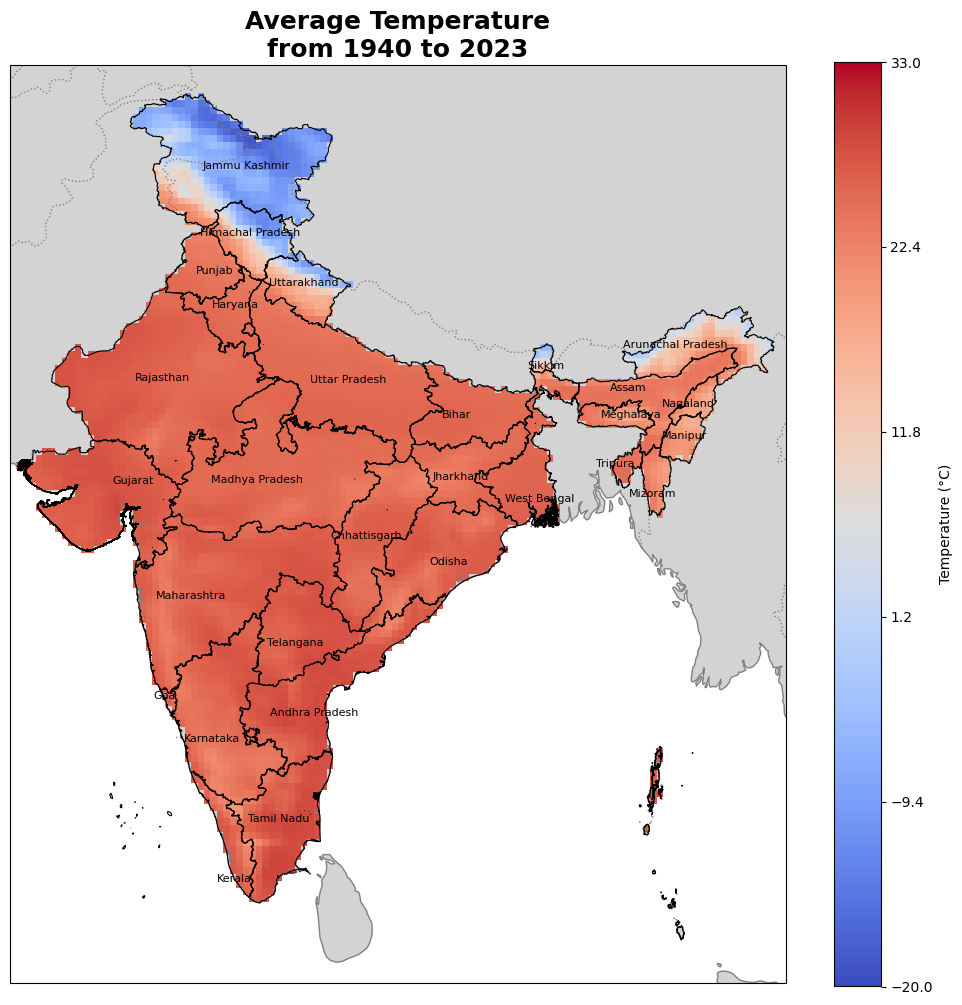

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Add Indian state boundaries
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Plot the masked data
T_daily_avg_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=-20, vmax=33, cbar_kwargs={'label': 'Temperature (°C)','ticks': np.linspace(-20, 33, num=6)})

# Plot city points and labels
for _, row in capitals_df.iterrows():
    #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
    ax.text(row["Longitude"], row["Latitude"], row["State"],
            transform=ccrs.PlateCarree(), fontsize=8, color='black',
            horizontalalignment='center', verticalalignment='center', zorder=10)

# Title and labels
plt.title("Daily Average Temperature\nfrom 1940 to 2023", fontsize=18, fontweight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()

In [6]:
# Compute daily time-averaged RH
RH_daily_avg_data = RH_daily['daily_avg_RH'].sel(time=slice('1940-01-01', '2023-12-31')).mean(dim='time')

In [7]:
# colorbar extremes
print(RH_daily_avg_data.max().values)
print(RH_daily_avg_data.min().values)

89.64778137207031
38.5539436340332


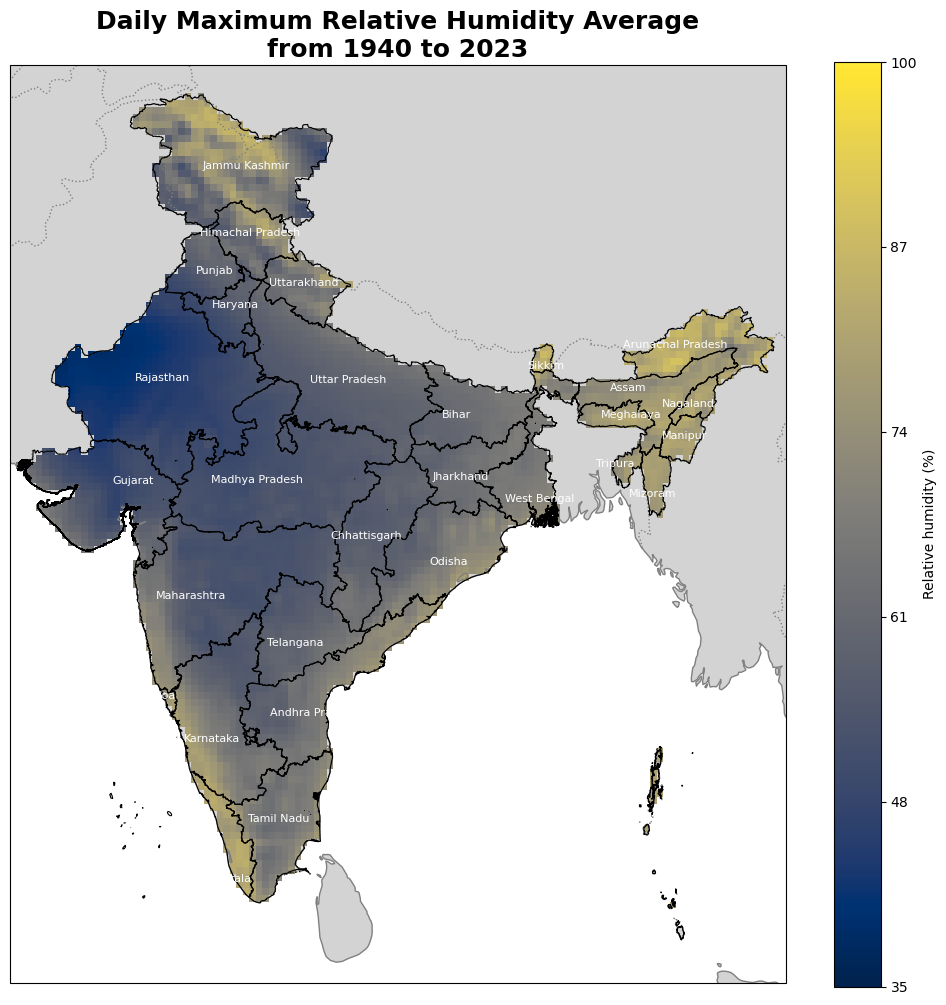

In [10]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Add Indian state boundaries
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Plot the masked data
RH_daily_avg_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='cividis', vmin=35, vmax=100, cbar_kwargs={'label': 'Relative humidity (%)','ticks': np.linspace(35, 100, num=6)})

# Plot city points and labels
for _, row in capitals_df.iterrows():
    #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
    ax.text(row["Longitude"], row["Latitude"], row["State"],
            transform=ccrs.PlateCarree(), fontsize=8, color='white',
            horizontalalignment='center', verticalalignment='center', zorder=10)

# Title and labels
plt.title("Daily Maximum Relative Humidity Average\nfrom 1940 to 2023", fontsize=18, fontweight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()

In [10]:
# Compute daily time-averaged HI
HI_daily_avg_data = HI_daily['daily_avg_HI'].sel(time=slice('1940-01-01', '2023-12-31')).mean(dim='time')

In [11]:
# colorbar extremes
print(HI_daily_avg_data.max().values)
print(HI_daily_avg_data.min().values)

32.12389373779297
-0.2029765397310257


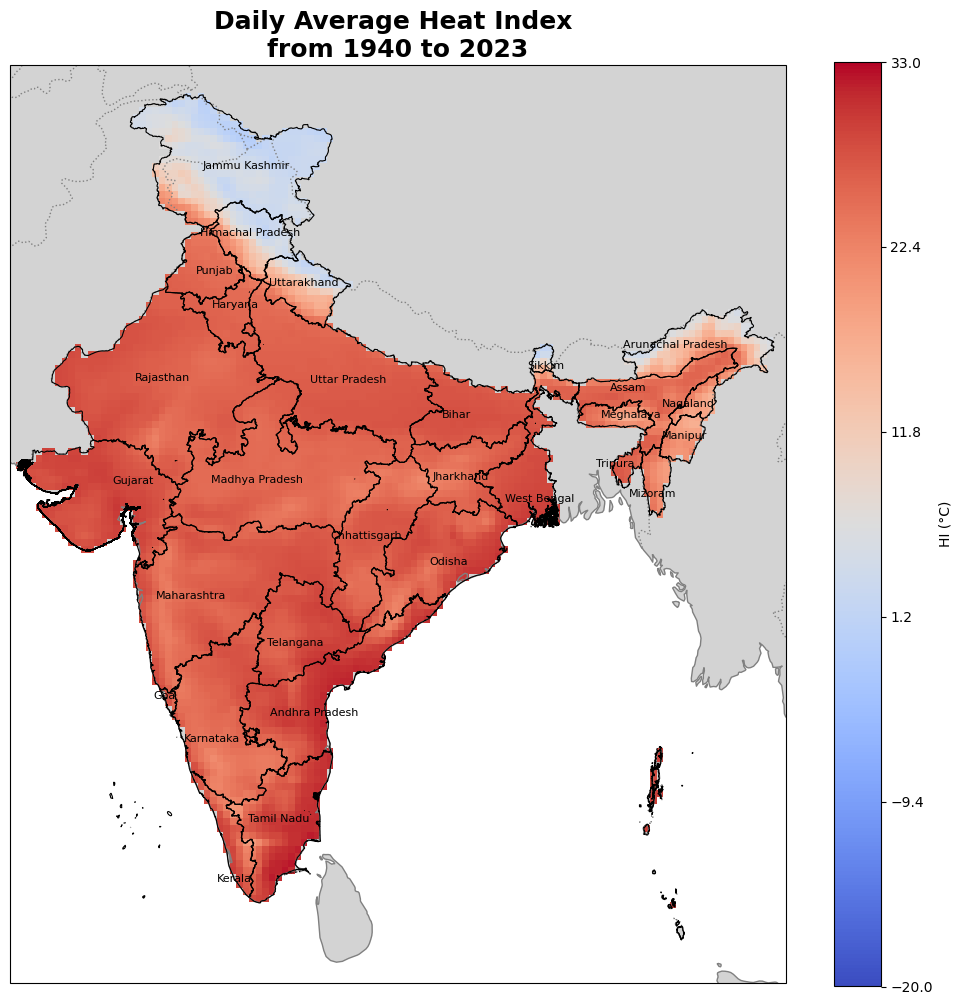

In [13]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Add Indian state boundaries
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Plot the masked data
HI_daily_avg_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=-20, vmax=33, cbar_kwargs={'label': 'HI (°C)','ticks': np.linspace(-20, 33, num=6)})

# Plot city points and labels
for _, row in capitals_df.iterrows():
    #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
    ax.text(row["Longitude"], row["Latitude"], row["State"],
            transform=ccrs.PlateCarree(), fontsize=8, color='black',
            horizontalalignment='center', verticalalignment='center', zorder=10)

# Title and labels
plt.title("Daily Average Heat Index \nfrom 1940 to 2023", fontsize=18, fontweight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()

3.1.5 - Daily Maximum Average Data representation

In [ ]:
# Compute time-averaged daily max T
T_daily_max_data = T_daily['daily_max_temp'].sel(time=slice('1940-01-01', '2023-12-31')).mean(dim='time')

In [15]:
# colorbar extremes
print(T_daily_max_data.max().values)
print(T_daily_max_data.min().values)

34.78351593017578
-14.749374389648438


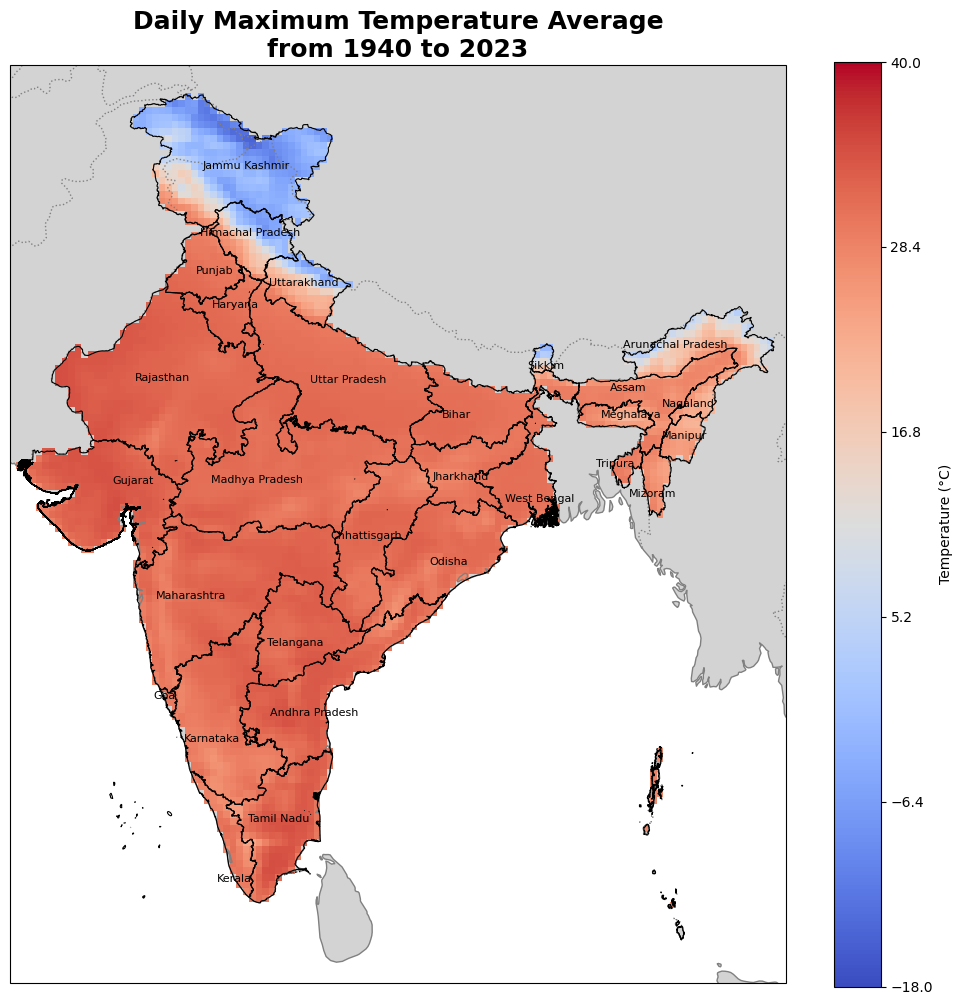

In [35]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Add Indian state boundaries
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Plot the masked data
T_daily_max_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=-18, vmax=40, cbar_kwargs={'label': 'Temperature (°C)','ticks': np.linspace(-18, 40, num=6)})

# Plot city points and labels
for _, row in capitals_df.iterrows():
    #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
    ax.text(row["Longitude"], row["Latitude"], row["State"],
            transform=ccrs.PlateCarree(), fontsize=8, color='black',
            horizontalalignment='center', verticalalignment='center', zorder=10)

# Title and labels
plt.title("Daily Maximum Temperature Average\nfrom 1940 to 2023", fontsize=18, fontweight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Compute time-averaged daily max RH
RH_daily_max_data = RH_daily['daily_max_RH'].sel(time=slice('1940-01-01', '2023-12-31')).mean(dim='time')

In [20]:
# colorbar extremes
print(RH_daily_max_data.max().values)
print(RH_daily_max_data.min().values)

97.78038024902344
56.76155471801758


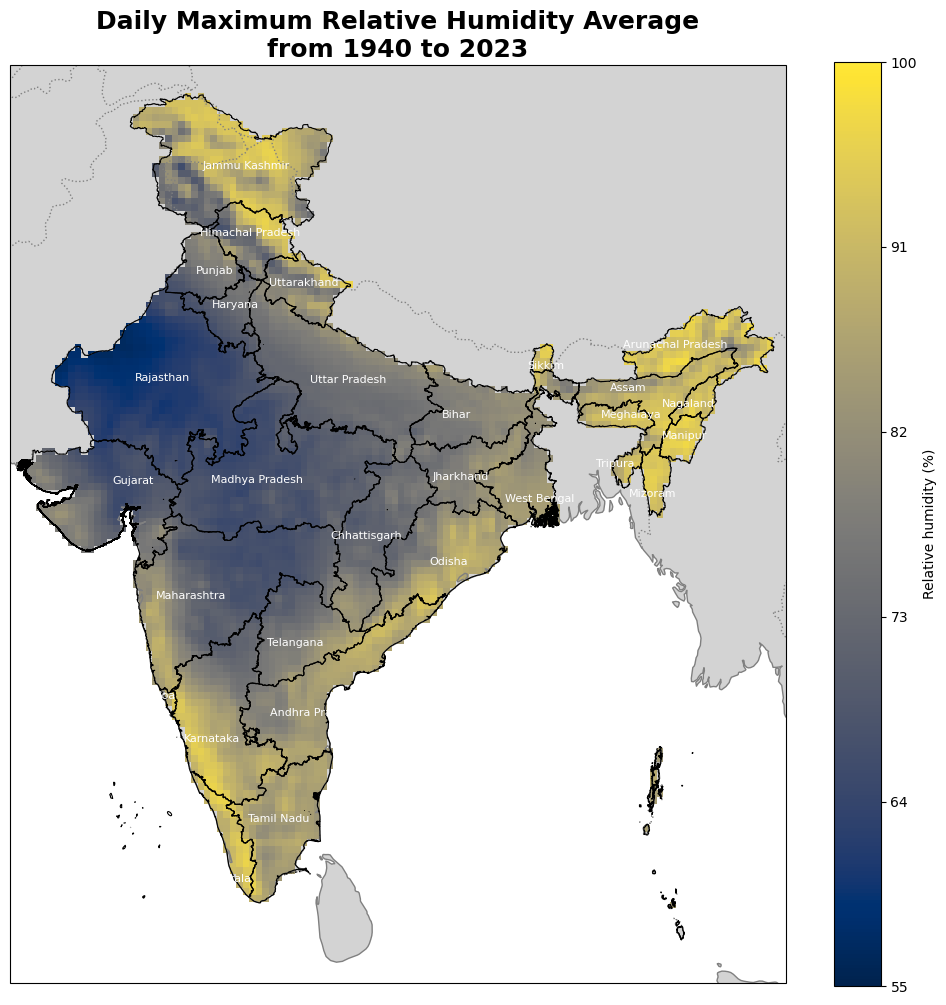

In [30]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Add Indian state boundaries
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Plot the masked data
RH_daily_max_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='cividis', vmin=55, vmax=100, cbar_kwargs={'label': 'Relative humidity (%)','ticks': np.linspace(55, 100, num=6)})

# Plot city points and labels
for _, row in capitals_df.iterrows():
    #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
    ax.text(row["Longitude"], row["Latitude"], row["State"],
            transform=ccrs.PlateCarree(), fontsize=8, color='white',
            horizontalalignment='center', verticalalignment='center', zorder=10)

# Title and labels
plt.title("Daily Maximum Relative Humidity Average\nfrom 1940 to 2023", fontsize=18, fontweight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
# Compute daily time-averaged daily max HI
HI_daily_max_data = HI_daily['daily_max_HI'].sel(time=slice('1940-01-01', '2023-12-31')).mean(dim='time')

In [16]:
# colorbar extremes
print(HI_daily_max_data.max().values)
print(HI_daily_max_data.min().values)

39.1953239440918
-0.046119965612888336


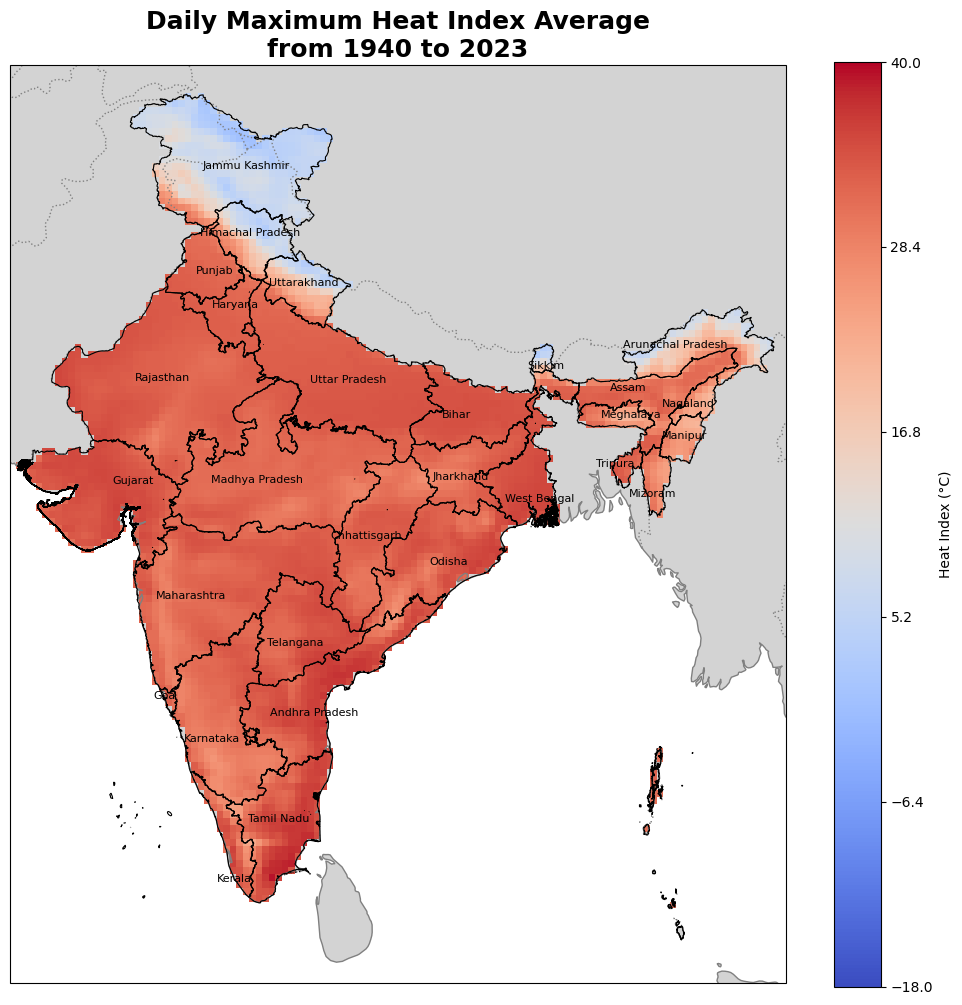

In [17]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Add Indian state boundaries
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Plot the masked data
HI_daily_max_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=-18, vmax=40, cbar_kwargs={'label': 'Heat Index (°C)','ticks': np.linspace(-18, 40, num=6)})

# Plot city points and labels
for _, row in capitals_df.iterrows():
    #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
    ax.text(row["Longitude"], row["Latitude"], row["State"],
            transform=ccrs.PlateCarree(), fontsize=8, color='black',
            horizontalalignment='center', verticalalignment='center', zorder=10)

# Title and labels
plt.title("Daily Maximum Heat Index Average\nfrom 1940 to 2023", fontsize=18, fontweight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()

---
3.2 - Anaylsis T°, RH and HI 3h

3.2.1 - 3h max values

In [49]:
max_T = T_3h['t2m'].max().values

In [50]:
max_T

array(51.99523926)

In [51]:
max_coords_T = T_3h['t2m'].where(T_3h == max_T, drop=True)

In [53]:
max_coords_T

<xarray.Dataset>
Dimensions:    (time: 1, latitude: 1, longitude: 1)
Coordinates:
  * time       (time) datetime64[ns] 2010-05-26T12:00:00
  * longitude  (longitude) float32 69.75
  * latitude   (latitude) float32 27.25
Data variables:
    t2m        (time, latitude, longitude) float32 52.0
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Oct 16 17:32:30 2024: cdo -b F32 mergetime 1940_India_t...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [73]:
# Compute time-averaged relative humidity
May_19_2016_T = T_3h.sel(time=slice('2016-05-19')).max(dim='time')
May_19_2016_T

<xarray.Dataset>
Dimensions:    (longitude: 120, latitude: 124)
Coordinates:
  * longitude  (longitude) float32 68.0 68.25 68.5 68.75 ... 97.25 97.5 97.75
  * latitude   (latitude) float32 38.0 37.75 37.5 37.25 ... 8.0 7.75 7.5 7.25
Data variables:
    t2m        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan

In [83]:
T_3h.sel(time=slice('2016-05-19')).max(dim='time').max().values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Data variables:
    t2m      float64 52.0>

In [74]:
May_19_2016_T['t2m'].max().values

array(51.99523926)

In [75]:
# Extract the corresponding HI and RH for the maximum temperature on May 19, 2016
May_19_2016_HI = HI_3h['heat_index'].sel(latitude=May_19_2016_T['t2m'].latitude, longitude=May_19_2016_T['t2m'].longitude, time='2016-05-19')
May_19_2016_RH = RH_3h['r'].sel(latitude=May_19_2016_T['t2m'].latitude, longitude=May_19_2016_T['t2m'].longitude, time='2016-05-19')

May_19_2016_HI.max().values, May_19_2016_RH.max().values

(array(54.63526535), array(99.99658966))

In [ ]:
# Extract the corresponding HI and RH for May_19_2016_T
May_19_2016_HI = HI_3h['heat_index'].sel(latitude=May_19_2016_T.latitude, longitude=May_19_2016_T.longitude, time='2016-05-19')
May_19_2016_RH = RH_3h['r'].sel(latitude=May_19_2016_T.latitude, longitude=May_19_2016_T.longitude, time='2016-05-19')

May_19_2016_HI.max(), May_19_2016_RH.max()

(<xarray.DataArray 'heat_index' (time: 8, latitude: 124, longitude: 120)>
 array([[[nan, nan, ..., nan, nan],
         [nan, nan, ..., nan, nan],
         ...,
         [nan, nan, ..., nan, nan],
         [nan, nan, ..., nan, nan]],
 
        [[nan, nan, ..., nan, nan],
         [nan, nan, ..., nan, nan],
         ...,
         [nan, nan, ..., nan, nan],
         [nan, nan, ..., nan, nan]],
 
        ...,
 
        [[nan, nan, ..., nan, nan],
         [nan, nan, ..., nan, nan],
         ...,
         [nan, nan, ..., nan, nan],
         [nan, nan, ..., nan, nan]],
 
        [[nan, nan, ..., nan, nan],
         [nan, nan, ..., nan, nan],
         ...,
         [nan, nan, ..., nan, nan],
         [nan, nan, ..., nan, nan]]], dtype=float32)
 Coordinates:
   * time       (time) datetime64[ns] 2016-05-19 ... 2016-05-19T21:00:00
   * longitude  (longitude) float32 68.0 68.25 68.5 68.75 ... 97.25 97.5 97.75
   * latitude   (latitude) float32 38.0 37.75 37.5 37.25 ... 8.0 7.75 7.5 7.25,
 <xarra

In [86]:
# Get the maximum temperature value
may_T_val = T_3h.sel(time=slice('2016-05-19')).max(dim='time').max().values
may_T_coords = T_3h['t2m'].where(T_3h['t2m'] == max_T, drop=True)

may_time = may_T_coords.time.values[0]
may_lat = float(may_T_coords.latitude.values[0])
may_lon = float(may_T_coords.longitude.values[0])

print(may_T_val)
print(f"Location: {may_lat}°N, {may_lon}°E")

# Get corresponding HI and RH at the same time and location
corresponding_HI_may = HI_3h['heat_index'].sel(latitude=may_lat, longitude=may_lon, time=may_time).values
corresponding_RH_may = RH_3h['r'].sel(latitude=may_lat, longitude=may_lon, time=may_time).values

print(f"Corresponding HI: {corresponding_HI_may:.2f}°C")
print(f"Corresponding RH: {corresponding_RH_may:.2f}%")

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  ()
Data variables:
    t2m      float64 52.0>
Location: 37.0°N, 68.25°E
Corresponding HI: nan°C
Corresponding RH: nan%


In [82]:
# Find the minimum temperature value, its date, and location
min_T_val = T_3h['t2m'].max().values
min_T_coords = T_3h['t2m'].where(T_3h['t2m'] == min_T_val, drop=True)

min_time = min_T_coords.time.values[0]
min_lat = float(min_T_coords.latitude.values[0])
min_lon = float(min_T_coords.longitude.values[0])

print(f"Minimum T: {min_T_val:.2f}°C")
print(f"Date: {str(min_time)}")
print(f"Location: {min_lat}°N, {min_lon}°E")

# Get corresponding HI and RH at the same time and location
corresponding_HI_min = HI_3h['heat_index'].sel(latitude=min_lat, longitude=min_lon, time=min_time).values
corresponding_RH_min = RH_3h['r'].sel(latitude=min_lat, longitude=min_lon, time=min_time).values

print(f"Corresponding HI: {corresponding_HI_min:.2f}°C")
print(f"Corresponding RH: {corresponding_RH_min:.2f}%")

Minimum T: 52.00°C
Date: 2010-05-26T12:00:00.000000000
Location: 27.25°N, 69.75°E
Corresponding HI: 45.95°C
Corresponding RH: 5.40%


In [59]:
T_3h['t2m'].mean().values

array(22.239685, dtype=float32)

3 hour RH values

In [28]:
max_RH = RH_3h['r'].max().values

In [169]:
max_coords_RH = RH_3h['r'].where(RH_3h == max_RH, drop=True)

In [231]:
max_coords_RH

<xarray.Dataset>
Dimensions:    (time: 9, latitude: 10, longitude: 8)
Coordinates:
  * time       (time) datetime64[ns] 2004-01-30T21:00:00 ... 2015-07-23T21:00:00
  * longitude  (longitude) float32 73.75 74.75 75.0 78.5 78.75 81.75 93.5 94.25
  * latitude   (latitude) float32 36.5 35.25 35.0 33.75 ... 24.25 19.75 13.75
Data variables:
    r          (time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Oct 17 21:23:40 2024: cdo -b F32 mergetime 1940_India_R...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

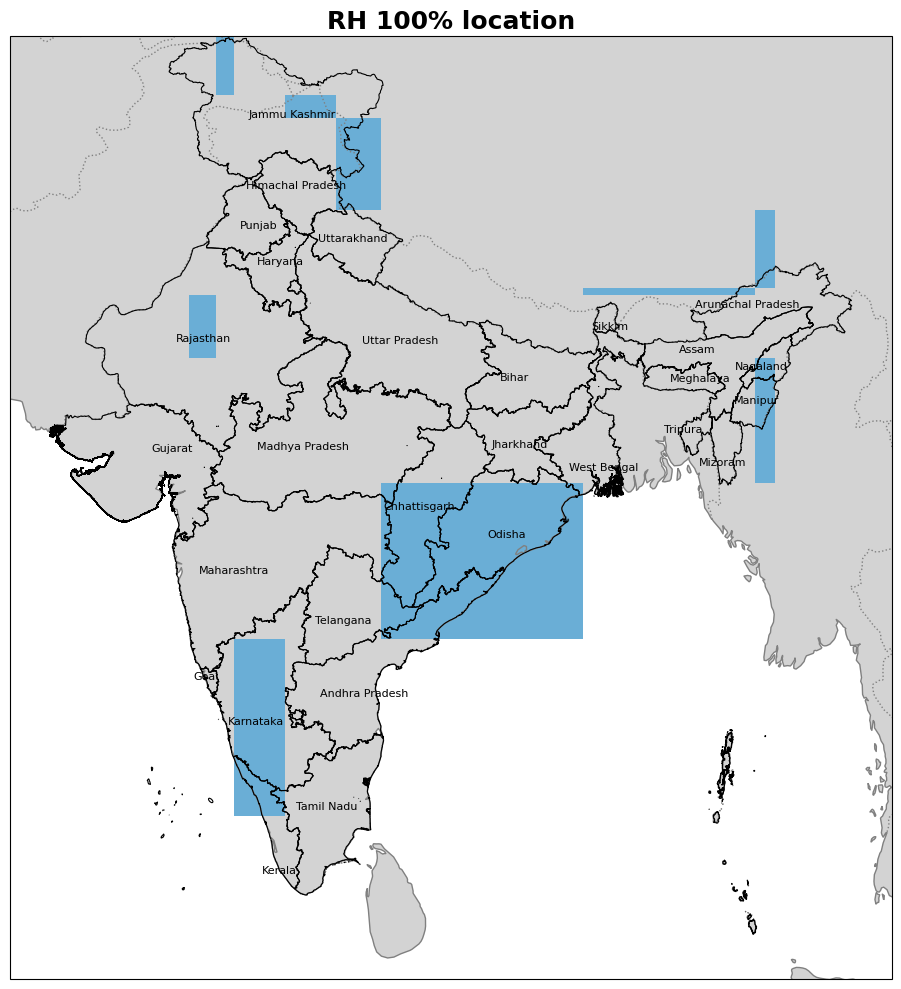

In [230]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Add Indian state boundaries
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)

# Plot the masked data
max_coords_RH['r'].mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues', add_colorbar=False)

# Plot city points and labels
for _, row in capitals_df.iterrows():
    #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
    ax.text(row["Longitude"], row["Latitude"], row["State"],
            transform=ccrs.PlateCarree(), fontsize=8, color='black',
            horizontalalignment='center', verticalalignment='center', zorder=10)

# Title and labels
plt.title("RH 100% location", fontsize=18, fontweight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.tight_layout()
plt.show()

In [60]:
# Find the minimum RH value, its date, and location
min_RH_val = RH_3h['r'].min().values
min_RH_coords = RH_3h['r'].where(RH_3h['r'] == min_RH_val, drop=True)

min_rh_time = min_RH_coords.time.values[0]
min_rh_lat = float(min_RH_coords.latitude.values[0])
min_rh_lon = float(min_RH_coords.longitude.values[0])

print(f"Minimum RH: {min_RH_val:.2f}%")
print(f"Date: {str(min_rh_time)}")
print(f"Location: {min_rh_lat}°N, {min_rh_lon}°E")

# Get corresponding HI and T at the same time and location
corresponding_HI_rh_min = HI_3h['heat_index'].sel(latitude=min_rh_lat, longitude=min_rh_lon, time=min_rh_time).values
corresponding_T_rh_min = T_3h['t2m'].sel(latitude=min_rh_lat, longitude=min_rh_lon, time=min_rh_time).values

print(f"Corresponding HI: {corresponding_HI_rh_min:.2f}°C")
print(f"Corresponding T: {corresponding_T_rh_min:.2f}°C")

Minimum RH: 0.00%
Date: 2003-01-15T00:00:00.000000000
Location: 31.0°N, 79.5°E
Corresponding HI: nan°C
Corresponding T: -19.65°C


3hour HI data

In [61]:
HI_3h['heat_index'].max().values

array(115.97612762)

In [30]:
max_HI = HI_3h['heat_index'].max()
max_HI

<xarray.DataArray 'heat_index' ()>
array(115.97612762)

In [31]:
max_coords_HI = HI_3h['heat_index'].where(HI_3h == max_HI, drop=True)

In [32]:
max_lat_HI = float(max_coords_HI.latitude.values)
max_lon_HI = float(max_coords_HI.longitude.values)
max_time_HI = max_coords_HI.time.values

In [33]:
true_T_max_HI = T_3h['t2m'].sel(latitude=max_lat_HI, longitude=max_lon_HI, time=max_time_HI).values
true_T_max_HI

array([41.182312], dtype=float32)

In [34]:
true_RH_max_HI = RH_3h['r'].sel(latitude=max_lat_HI, longitude=max_lon_HI, time=max_time_HI).values
true_RH_max_HI

array([98.889175], dtype=float32)

In [62]:
# Find the maximum HI value, its date, and location
max_HI_val = HI_3h['heat_index'].max().values
max_HI_coords = HI_3h['heat_index'].where(HI_3h['heat_index'] == max_HI_val, drop=True)

max_hi_time = max_HI_coords.time.values[0]
max_hi_lat = float(max_HI_coords.latitude.values[0])
max_hi_lon = float(max_HI_coords.longitude.values[0])

print(f"Maximum HI: {max_HI_val:.2f}°C")
print(f"Date: {str(max_hi_time)}")
print(f"Location: {max_hi_lat}°N, {max_hi_lon}°E")

# Get corresponding T and RH at the same time and location
corresponding_T_max_hi = T_3h['t2m'].sel(latitude=max_hi_lat, longitude=max_hi_lon, time=max_hi_time).values
corresponding_RH_max_hi = RH_3h['r'].sel(latitude=max_hi_lat, longitude=max_hi_lon, time=max_hi_time).values

print(f"Corresponding T: {corresponding_T_max_hi:.2f}°C")
print(f"Corresponding RH: {corresponding_RH_max_hi:.2f}%")

Maximum HI: 115.98°C
Date: 1968-04-14T09:00:00.000000000
Location: 23.25°N, 87.5°E
Corresponding T: 41.18°C
Corresponding RH: 98.89%


In [67]:
avg_HI_val = HI_3h['heat_index'].mean().values
avg_HI_val

array(25.35513, dtype=float32)

In [68]:
# Find the minimum HI value, its date, and location
min_HI_val = HI_3h['heat_index'].min().values
min_HI_coords = HI_3h['heat_index'].where(HI_3h['heat_index'] == min_HI_val, drop=True)

min_hi_time = min_HI_coords.time.values[0]
min_hi_lat = float(min_HI_coords.latitude.values[0])
min_hi_lon = float(min_HI_coords.longitude.values[0])

print(f"Minimum HI: {min_HI_val:.2f}°C")
print(f"Date: {str(min_hi_time)}")
print(f"Location: {min_hi_lat}°N, {min_hi_lon}°E")

# Get corresponding T and RH at the same time and location
corresponding_T_min_hi = T_3h['t2m'].sel(latitude=min_hi_lat, longitude=min_hi_lon, time=min_hi_time).values
corresponding_RH_min_hi = RH_3h['r'].sel(latitude=min_hi_lat, longitude=min_hi_lon, time=min_hi_time).values

print(f"Corresponding T: {corresponding_T_min_hi:.2f}°C")
print(f"Corresponding RH: {corresponding_RH_min_hi:.2f}%")

Minimum HI: -1.92°C
Date: 1994-09-27T06:00:00.000000000
Location: 34.0°N, 76.25°E
Corresponding T: 0.01°C
Corresponding RH: 3.22%


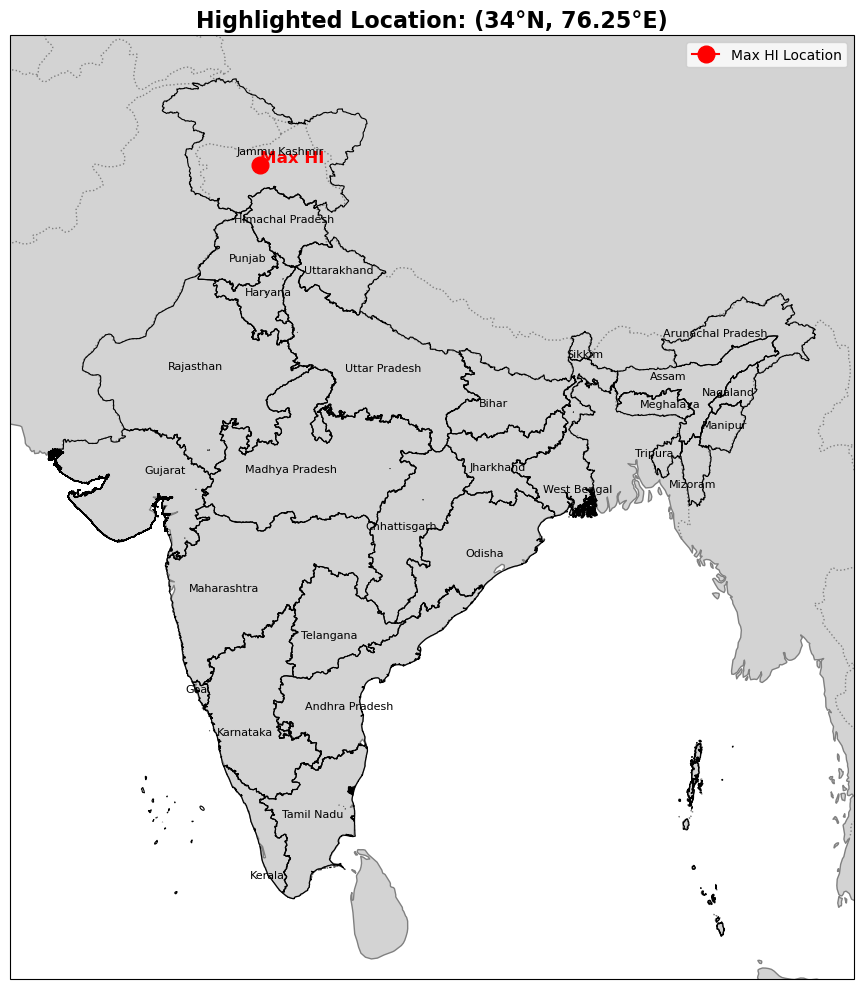

In [88]:
# Find location

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Add Indian state boundaries
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=0.8)
# Plot city points and labels
for _, row in capitals_df.iterrows():
    #ax.plot(row["Longitude"], row["Latitude"], 'o', color='black', transform=ccrs.PlateCarree(), zorder=5)
    ax.text(row["Longitude"], row["Latitude"], row["State"],
            transform=ccrs.PlateCarree(), fontsize=8, color='black',
            horizontalalignment='center', verticalalignment='center', zorder=10)

# Plot the highlighted location
ax.plot(76.25, 34, marker='o', color='red', markersize=12, transform=ccrs.PlateCarree(), label='Max HI Location')

# Optionally, add a label
ax.text(76.25, 34, 'Max HI', color='red', fontsize=12, fontweight='bold',
    transform=ccrs.PlateCarree(), ha='left', va='bottom')

# Title and labels
plt.title("Highlighted Location: (34°N, 76.25°E)", fontsize=16, fontweight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.legend()
plt.tight_layout()
plt.show()

In [40]:
# Extract the heat index value corresponding to the maximum temperature = 52°C
corresponding_HI = HI_3h['heat_index'].sel(
    latitude=max_coords_T.latitude.values,
    longitude=max_coords_T.longitude.values,
    time=max_coords_T.time.values
).values

corresponding_HI

array([[[45.953827]]], dtype=float32)

In [26]:
corresponding_RH = RH_3h['r'].sel(
    latitude=max_coords_T.latitude.values,
    longitude=max_coords_T.longitude.values,
    time=max_coords_T.time.values
).values

corresponding_RH

array([[[5.3983803]]], dtype=float32)

In [ ]:
extreme_T = (T_3h['t2m'] > true_T_max_HI).sum().values

In [204]:
extreme_T

array(7411473)

3.2.2 - 3h avg values

In [164]:
T_3h['t2m'].mean().values

array(22.239685, dtype=float32)

In [37]:
RH_3h['r'].mean().values

array(60.88083, dtype=float32)

In [41]:
avg_heat_index = HI_3h['heat_index'].mean()
avg_heat_index

<xarray.DataArray 'heat_index' ()>
array(25.35513, dtype=float32)

3.2.3 - 3h min values

In [165]:
min_T = T_3h['t2m'].min().values

In [166]:
min_coords_T = T_3h['t2m'].where(T_3h == min_T, drop=True)

In [167]:
min_coords_T

<xarray.Dataset>
Dimensions:    (time: 1, latitude: 1, longitude: 1)
Coordinates:
  * time       (time) datetime64[ns] 1964-12-13
  * longitude  (longitude) float32 78.25
  * latitude   (latitude) float32 34.25
Data variables:
    t2m        (time, latitude, longitude) float32 -52.78
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Oct 16 17:32:30 2024: cdo -b F32 mergetime 1940_India_t...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [171]:
min_RH = RH_3h['r'].min().values

In [174]:
min_coords_T = RH_3h['r'].where(RH_3h == min_RH, drop=True)

In [175]:
min_coords_T

<xarray.Dataset>
Dimensions:    (time: 1, latitude: 1, longitude: 1)
Coordinates:
  * time       (time) datetime64[ns] 2003-01-15
  * longitude  (longitude) float32 79.5
  * latitude   (latitude) float32 31.0
Data variables:
    r          (time, latitude, longitude) float32 8.297e-05
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Oct 17 21:23:40 2024: cdo -b F32 mergetime 1940_India_R...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

---
3.3 - Correlation

3.3.1 - Correlation T° vs RH 3h

In [ ]:
# Calculate correlation
correlation_T_RH_3h = xr.corr(T_3h['t2m'], RH_3h['r'], dim='time')

In [ ]:
print(correlation_T_RH_3h.max().values)
print(correlation_T_RH_3h.mean().values)
print(correlation_T_RH_3h.min().values)

0.5156273208215658
-0.34982792285146247
-0.8713247725157877


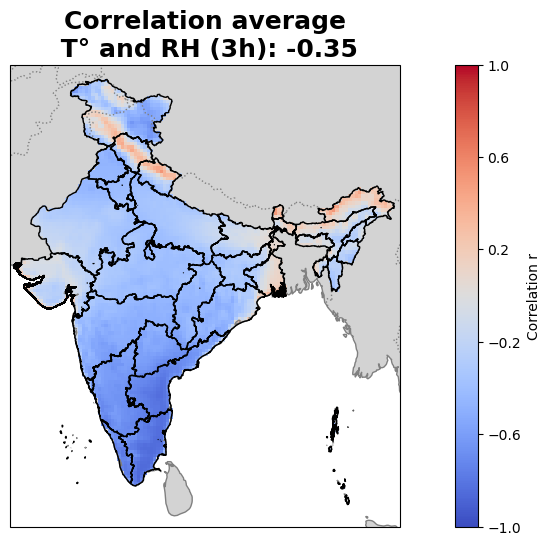

In [ ]:
# Create figure and axis with Cartopy projection
fig, ax = plt.subplots(figsize=(14, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Plot the correlation data
correlation_T_RH_3h.plot(ax=ax, cmap='coolwarm', vmin=-1, vmax=1, cbar_kwargs={'label': 'Correlation r','ticks': np.linspace(-1, 1, num=6)})

# Plot Indian states boundaries on top
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Title
plt.title(f'Correlation average\n T° and RH (3h): {correlation_T_RH_3h.mean().values:.2f}', fontsize=18, fontweight='bold')

# Show the plot
plt.show()


3.3.2 - Correlation T° vs HI 3h

In [42]:
# Calculate correlation
correlation_T_HI_3h = xr.corr(T_3h['t2m'], HI_3h['heat_index'], dim='time')

In [43]:
print(correlation_T_HI_3h.max().values)
print(correlation_T_HI_3h.mean().values)
print(correlation_T_HI_3h.min().values)

0.9996847361959532
0.9643774579185277
0.8957870707409046


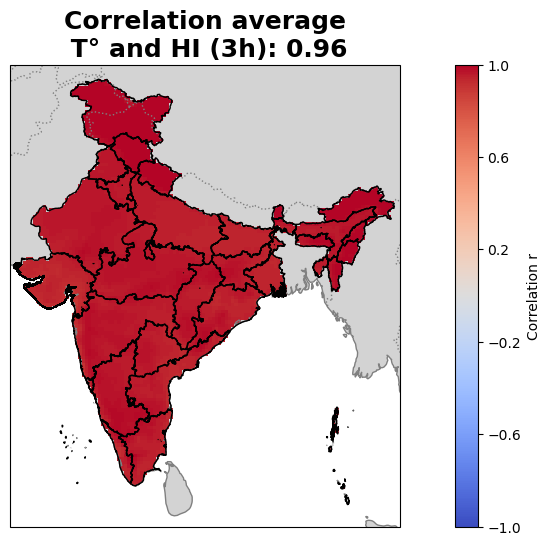

In [44]:
# Create figure and axis with Cartopy projection
fig, ax = plt.subplots(figsize=(14, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Plot the correlation data
correlation_T_HI_3h.plot(ax=ax, cmap='coolwarm', vmin=-1, vmax=1, cbar_kwargs={'label': 'Correlation r','ticks': np.linspace(-1, 1, num=6)})

# Plot Indian states boundaries on top
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Title
plt.title(f'Correlation average\n T° and HI (3h): {correlation_T_HI_3h.mean().values:.2f}', fontsize=18, fontweight='bold')

# Show the plot
plt.show()


3.3.3 - Correlation RH vs HI 3h

In [ ]:
# Calculate correlation
correlation_RH_HI_3h = xr.corr(RH_3h['r'], HI_3h['heat_index'], dim='time')

In [ ]:
print(correlation_RH_HI_3h.max().values)
print(correlation_RH_HI_3h.mean().values)
print(correlation_RH_HI_3h.min().values)

1.0
0.0253556960048181
-1.0


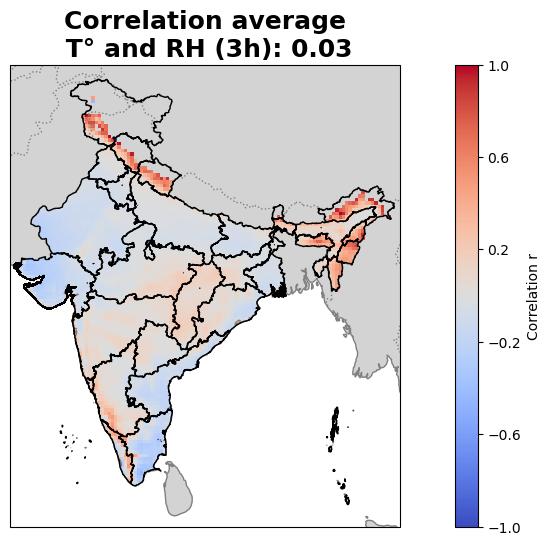

In [ ]:
# Create figure and axis with Cartopy projection
fig, ax = plt.subplots(figsize=(14, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Plot the correlation data
correlation_RH_HI_3h.plot(ax=ax, cmap='coolwarm', vmin=-1, vmax=1, cbar_kwargs={'label': 'Correlation r','ticks': np.linspace(-1, 1, num=6)})

# Plot Indian states boundaries on top
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Title
plt.title(f'Correlation average\n RH and HI (3h): {correlation_RH_HI_3h.mean().values:.2f}', fontsize=18, fontweight='bold')

# Show the plot
plt.show()

---
3.4 - Descriptive statistics on daily data

3.4.1 - 2m temperature

3.4.1.1 - Descriptive statistics T°

In [ ]:
# Descriptive statistics for daily max temperature
daily_max_T_df = T_daily['daily_max_temp'].to_dataframe().reset_index()
print(daily_max_T_df.describe())

                                time      latitude     longitude  \
count                      456533280  4.565333e+08  4.565333e+08   
mean   1981-12-31 00:00:00.000006080  2.262500e+01  8.288268e+01   
min              1940-01-01 00:00:00  7.250000e+00  6.800000e+01   
25%              1960-12-31 00:00:00  1.493750e+01  7.543750e+01   
50%              1981-12-31 00:00:00  2.262500e+01  8.287500e+01   
75%              2002-12-31 00:00:00  3.031250e+01  9.031250e+01   
max              2023-12-31 00:00:00  3.800000e+01  9.775000e+01   
std                              NaN  8.675384e+00  2.453769e+01   

       daily_max_temp  
count    1.426666e+08  
mean     2.754665e+01  
min     -4.041173e+01  
25%      2.562860e+01  
50%      2.966458e+01  
75%      3.352185e+01  
max      5.199524e+01  
std      1.458440e+01  


In [ ]:
# Descriptive statistics for daily average relative humidity
daily_avg_T_df = T_3h['daily_avg_temp'].to_dataframe().reset_index()
print(daily_avg_T_df.describe())

In [ ]:
# Descriptive statistics for daily min relative humidity
daily_min_T_df = T_3h['daily_min_temp'].to_dataframe().reset_index()
print(daily_min_T_df.describe())


3.3.1.2 - Annual average T°

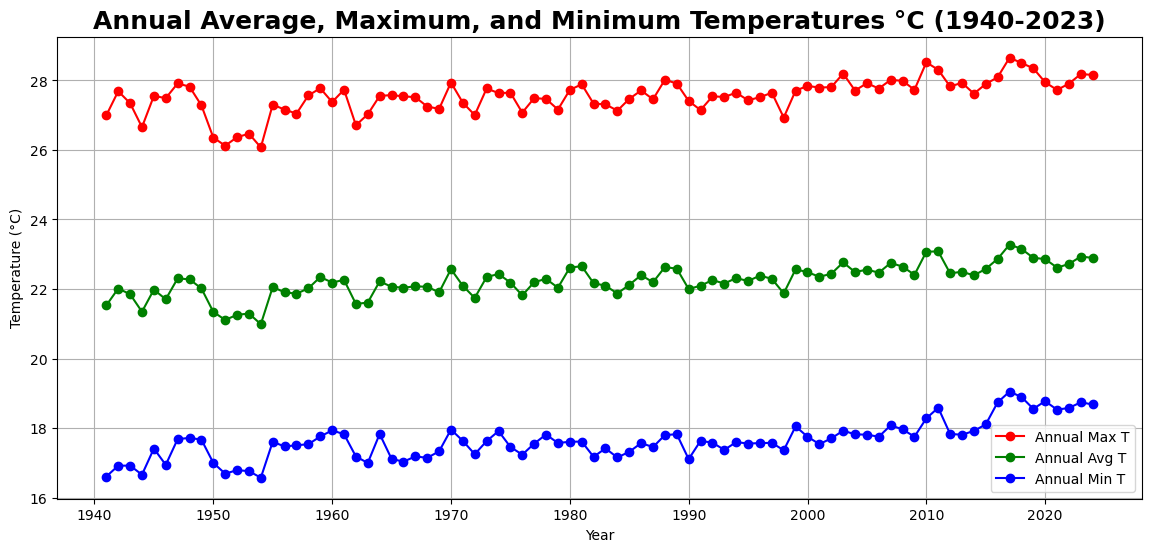

In [12]:
# Compute annual averages for relative humidity
annual_max_T = T_daily['daily_max_temp'].resample(time='Y').mean()
annual_avg_T = T_daily['daily_avg_temp'].resample(time='Y').mean()
annual_min_T = T_daily['daily_min_temp'].resample(time='Y').mean()

# Compute spatial averages for each year
annual_max_T_avg = annual_max_T.mean(dim=['latitude', 'longitude'])
annual_avg_T_avg = annual_avg_T.mean(dim=['latitude', 'longitude'])
annual_min_T_avg = annual_min_T.mean(dim=['latitude', 'longitude'])

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(annual_max_T['time'], annual_max_T_avg, label='Annual Max T', color='red', marker='o')
plt.plot(annual_avg_T['time'], annual_avg_T_avg, label='Annual Avg T', color='green', marker='o')
plt.plot(annual_min_T['time'], annual_min_T_avg, label='Annual Min T', color='blue', marker='o')

plt.title('Annual Average, Maximum, and Minimum Temperatures °C (1940-2023)', fontsize=18, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

3.3.1.3 - Histograms T°

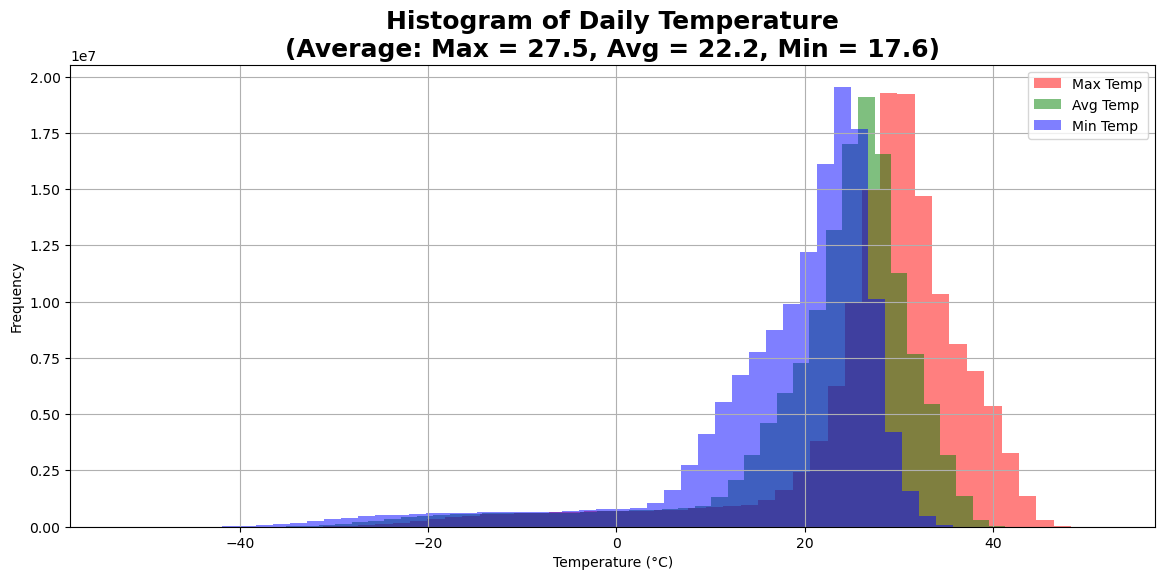

In [ ]:
plt.figure(figsize=(14, 6))
T_daily['daily_max_temp'].plot.hist(bins=50, alpha=0.5, color='red', label='Max Temp')
T_daily['daily_avg_temp'].plot.hist(bins=50, alpha=0.5, color='green', label='Avg Temp')
T_daily['daily_min_temp'].plot.hist(bins=50, alpha=0.5, color='blue', label='Min Temp')
plt.title(f"Histogram of Daily Temperature °C\n(Average: Max = {T_daily['daily_max_temp'].mean().values:.1f}, "
          f"Avg = {T_daily['daily_avg_temp'].mean().values:.1f}, "
          f"Min = {T_daily['daily_min_temp'].mean().values:.1f})", fontsize=18, fontweight='bold')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

3.3.1.4 - Heat Map T° on daily maximum

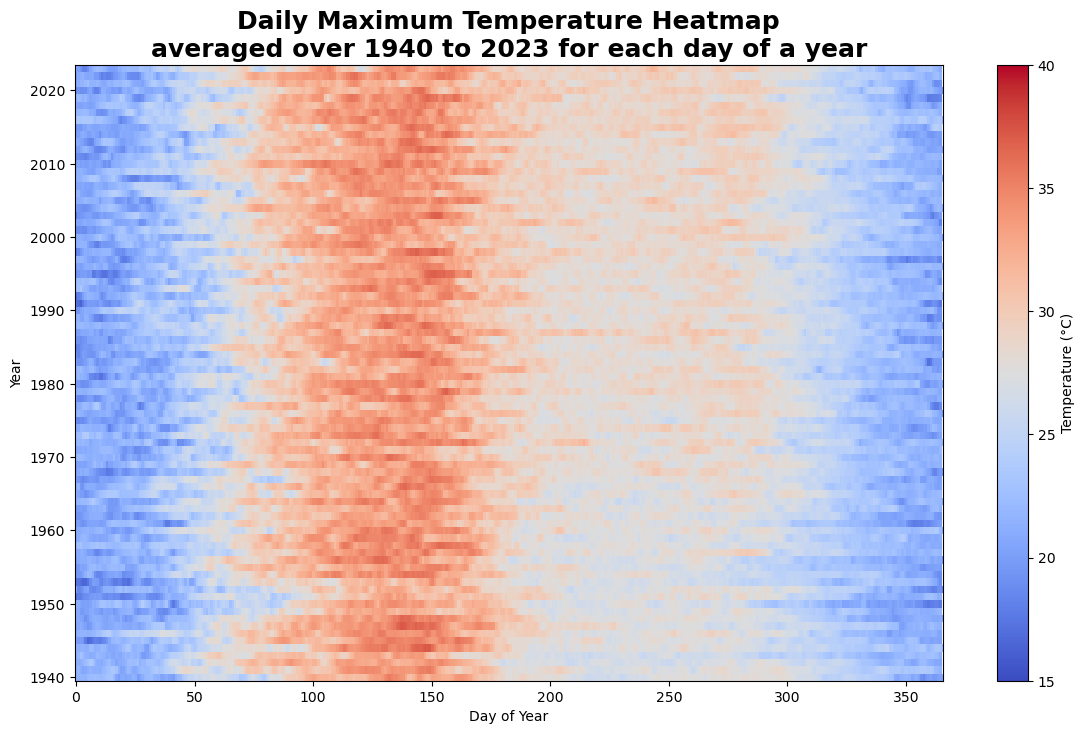

In [59]:
# Compute spatial average over latitude and longitude
daily_avg_temp_spatial = T_daily['daily_max_temp'].mean(dim=['latitude', 'longitude'])

# Convert to a pandas DataFrame
daily_data_T = daily_avg_temp_spatial.to_pandas()

# Reshape the data to have years as rows and days as columns
daily_data_T = daily_data_T.to_frame(name='daily_max_temp')
daily_data_T['year'] = daily_data_T.index.year
daily_data_T['day_of_year'] = daily_data_T.index.dayofyear
daily_pivot_T = daily_data_T.pivot_table(index='year', columns='day_of_year', values='daily_max_temp')

# Plotting the heatmap
plt.figure(figsize=(14, 8), facecolor='none')  # Transparent figure background
ax = plt.gca()
ax.set_facecolor('none')  # Transparent axes background

plt.imshow(daily_pivot_T, aspect='auto', cmap='coolwarm', interpolation='nearest', vmin=15, vmax=40)
plt.colorbar(label='Temperature (°C)')
plt.title('Daily Maximum Temperature Heatmap\naveraged over 1940 to 2023 for each day of a year', fontsize=18, fontweight='bold')
plt.xlabel('Day of Year')
plt.ylabel('Year')

years = daily_pivot_T.index
plt.yticks(ticks=range(len(years))[::10], labels=years[::10])

plt.gca().invert_yaxis()
plt.show()



In [57]:
daily_avg_temp_spatial.max().values

array(37.24779129)

In [58]:
daily_avg_temp_spatial.min().values

array(16.37146378)

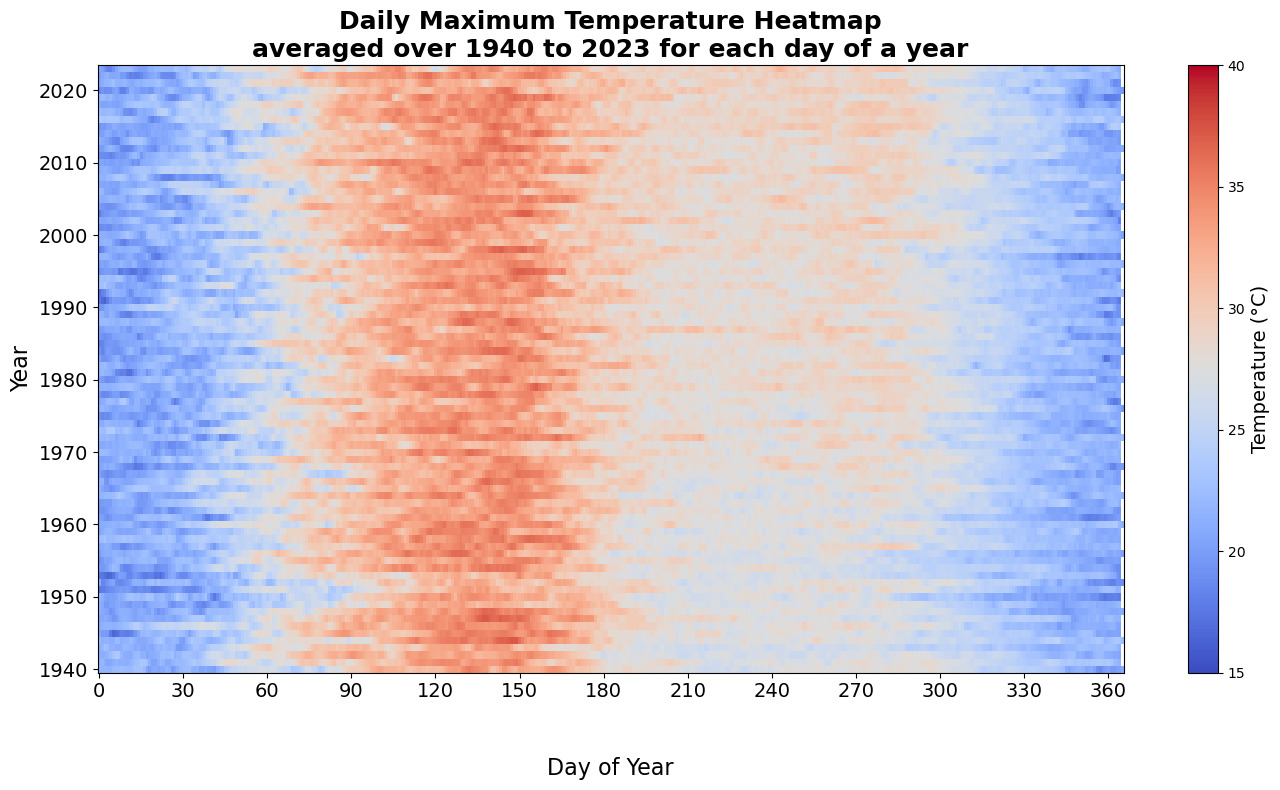

In [ ]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 8), facecolor='none')  # Transparent background

# Set axes background to transparent
ax.set_facecolor('none')

# Plot the heatmap
img = ax.imshow(daily_pivot_T, aspect='auto', cmap='coolwarm',
                interpolation='nearest', vmin=15, vmax=40)

# Add colorbar
cbar = plt.colorbar(img, ax=ax)
cbar.set_label('Temperature (°C)', fontsize=14)

# Set axis labels
ax.set_title('Daily Maximum Temperature Heatmap\naveraged over 1940 to 2023 for each day of a year', fontsize=18, fontweight='bold')
ax.set_xlabel('Day of Year', fontsize=16, labelpad=40)
ax.set_ylabel('Year', fontsize=16)

# Set ticks
ax.set_xticks(range(0, 366, 30))
ax.set_xticklabels(range(0, 366, 30), fontsize=14)

years = daily_pivot_T.index
ax.set_yticks(range(len(years))[::10])
ax.set_yticklabels(years[::10], fontsize=14)

# Invert Y-axis 
ax.invert_yaxis()

plt.tight_layout()
plt.show()


In [51]:
daily_avg_temp_spatial.max().values

array(37.24779129)

3.3.2 - Relative humidity

3.3.2.1 - Annual average

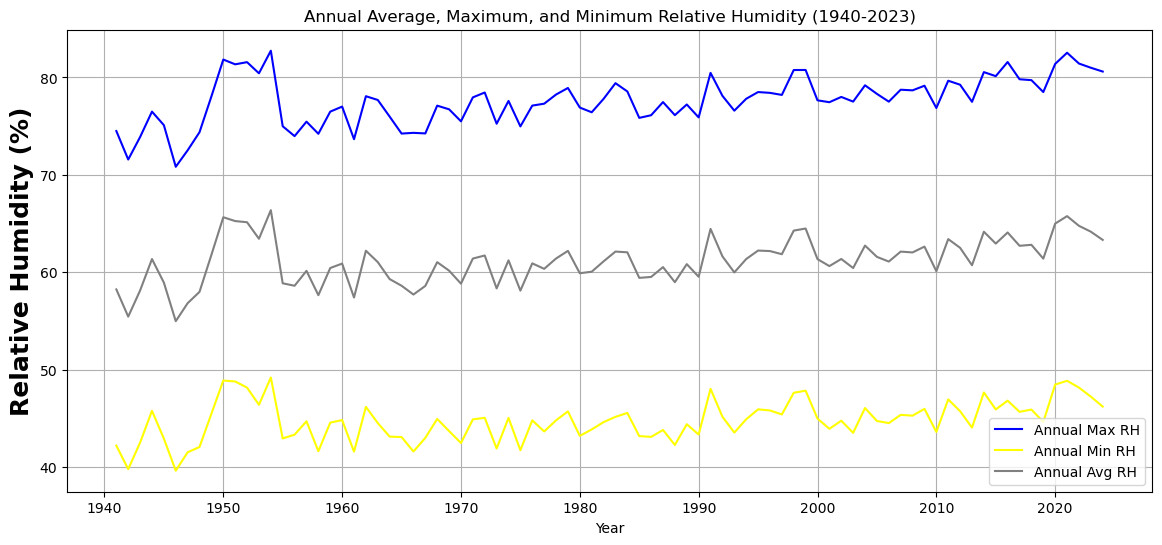

In [244]:
# Compute annual averages for relative humidity
annual_max_RH = RH_daily['daily_max_RH'].resample(time='Y').mean()
annual_min_RH = RH_daily['daily_min_RH'].resample(time='Y').mean()
annual_avg_RH = RH_daily['daily_avg_RH'].resample(time='Y').mean()

# Compute spatial averages for each year
annual_max_RH_avg = annual_max_RH.mean(dim=['latitude', 'longitude'])
annual_min_RH_avg = annual_min_RH.mean(dim=['latitude', 'longitude'])
annual_avg_RH_avg = annual_avg_RH.mean(dim=['latitude', 'longitude'])

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(annual_max_RH['time'], annual_max_RH_avg, label='Annual Max RH', color='blue')
plt.plot(annual_min_RH['time'], annual_min_RH_avg, label='Annual Min RH', color='yellow')
plt.plot(annual_avg_RH['time'], annual_avg_RH_avg, label='Annual Avg RH', color='gray')
plt.title('Annual Average, Maximum, and Minimum Relative Humidity (1940-2023)')
plt.xlabel('Year')
plt.ylabel('Relative Humidity (%)', fontsize=18, fontweight='bold')
plt.legend()
plt.grid()
plt.show()



3.3.2.2- Histogram

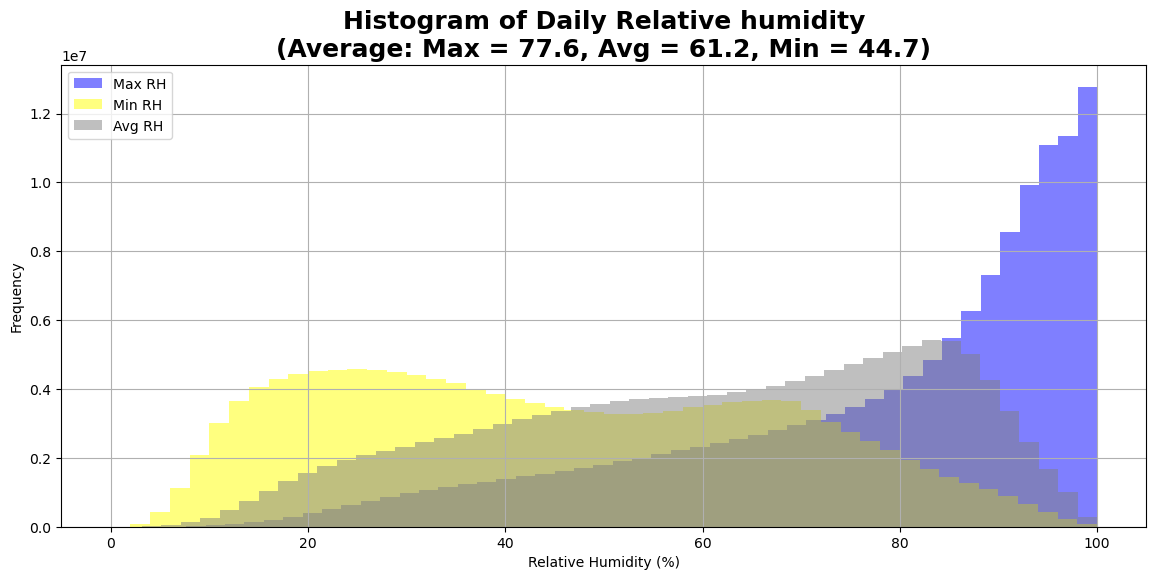

In [247]:
plt.figure(figsize=(14, 6))
(RH_daily['daily_max_RH']).plot.hist(bins=50, alpha=0.5, color='blue', label='Max RH')
(RH_daily['daily_min_RH']).plot.hist(bins=50, alpha=0.5, color='yellow', label='Min RH')
(RH_daily['daily_avg_RH']).plot.hist(bins=50, alpha=0.5, color='gray', label='Avg RH')

plt.title(f"Histogram of Daily Relative humidity\n(Average: Max = {RH_daily['daily_max_RH'].mean().values:.1f}, "
          f"Avg = {RH_daily['daily_avg_RH'].mean().values:.1f}, "
          f"Min = {RH_daily['daily_min_RH'].mean().values:.1f})", fontsize=18, fontweight='bold')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

3.3.2.3 - Heat map on daily max

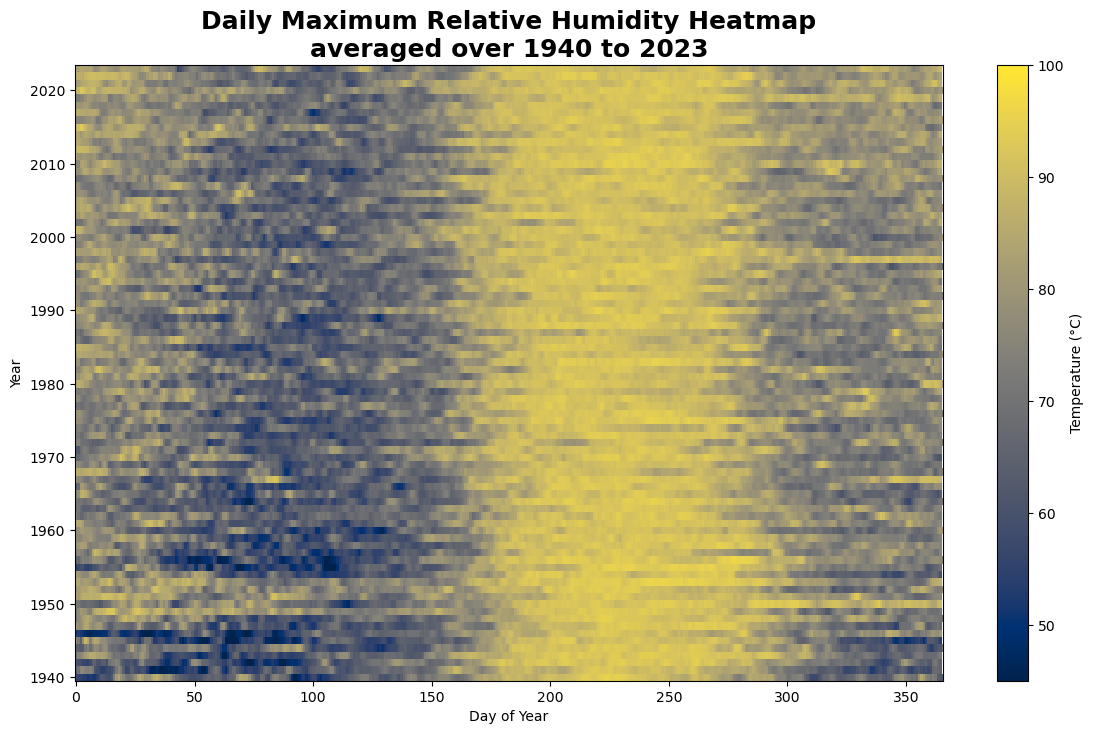

In [51]:
# Compute spatial average over latitude and longitude
daily_avg_temp_spatial = RH_daily['daily_max_RH'].mean(dim=['latitude', 'longitude'])

# Convert to a pandas DataFrame
daily_data_RH = daily_avg_temp_spatial.to_pandas()

# Reshape the data to have years as rows and days as columns
daily_data_RH = daily_data_RH.to_frame(name='daily_max_RH')
daily_data_RH['year'] = daily_data_RH.index.year
daily_data_RH['day_of_year'] = daily_data_RH.index.dayofyear
daily_pivot_RH = daily_data_RH.pivot_table(index='year', columns='day_of_year', values='daily_max_RH')

plt.figure(figsize=(14, 8), facecolor='none')  # Transparent figure background
ax = plt.gca()
ax.set_facecolor('none')  # Transparent axes background

plt.imshow(daily_pivot_RH, aspect='auto', cmap='cividis', interpolation='nearest', vmin=45, vmax=100)
plt.colorbar(label='Temperature (°C)')
plt.title('Daily Maximum Relative Humidity Heatmap\naveraged over 1940 to 2023', fontsize=18, fontweight='bold')
plt.xlabel('Day of Year')
plt.ylabel('Year')

years = daily_pivot_RH.index
plt.yticks(ticks=range(len(years))[::10], labels=years[::10])

plt.gca().invert_yaxis()
plt.show()

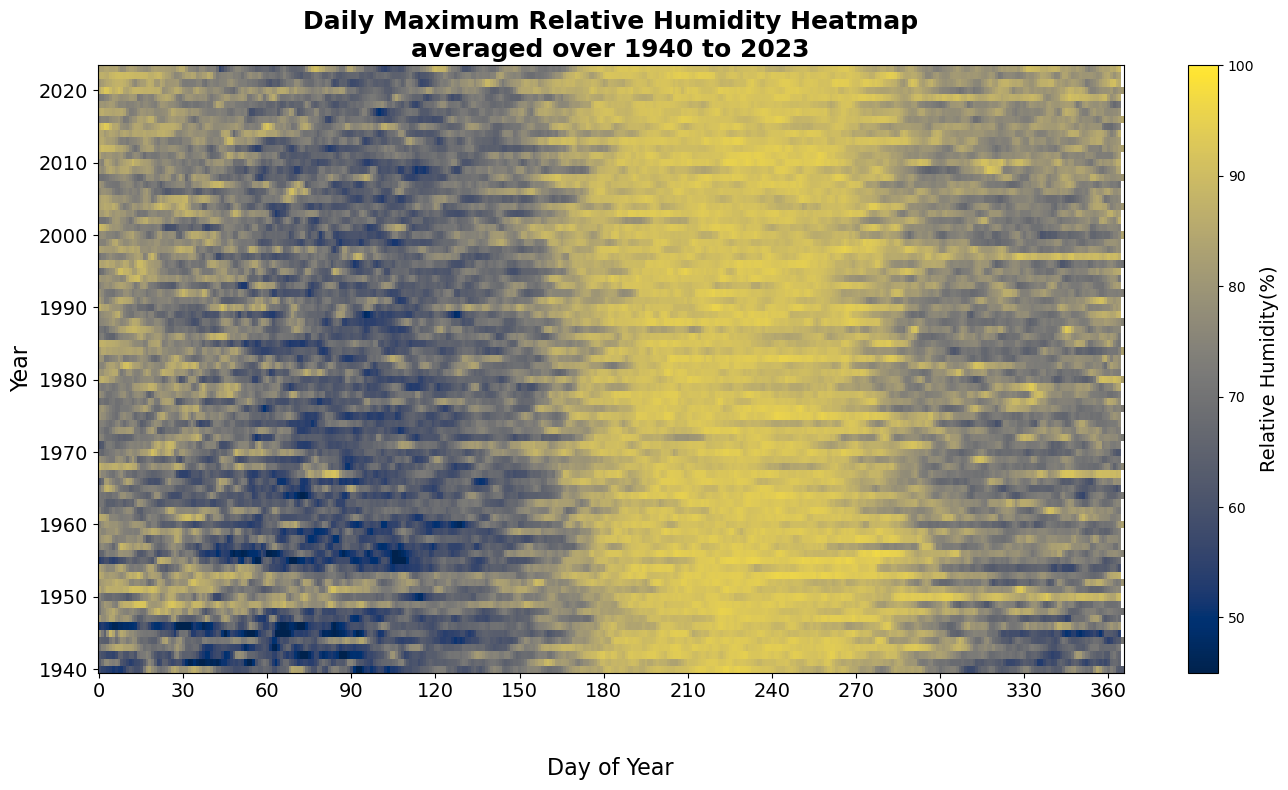

In [65]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 8), facecolor='none')  # Transparent background

# Set axes background to transparent
ax.set_facecolor('none')

# Plot the heatmap
img = ax.imshow(daily_pivot_RH, aspect='auto', cmap='cividis',
                interpolation='nearest', vmin=45, vmax=100)

# Add colorbar
cbar = plt.colorbar(img, ax=ax)
cbar.set_label('Relative Humidity(%)', fontsize=14)

# Set axis labels
ax.set_title('Daily Maximum Relative Humidity Heatmap\naveraged over 1940 to 2023', fontsize=18, fontweight='bold')
ax.set_xlabel('Day of Year', fontsize=16, labelpad=40)
ax.set_ylabel('Year', fontsize=16)

# Set ticks
ax.set_xticks(range(0, 366, 30))
ax.set_xticklabels(range(0, 366, 30), fontsize=14)

years = daily_pivot_RH.index
ax.set_yticks(range(len(years))[::10])
ax.set_yticklabels(years[::10], fontsize=14)

# Invert Y-axis (so older years are at the top)
ax.invert_yaxis()

plt.tight_layout()
plt.show()


In [9]:
daily_avg_temp_spatial.min().values

array(36.77853012)

3.3.3 - Heat Index °C

3.3.3.1 - Descriptive statistic HI

In [45]:
# Descriptive statistics for daily max heat index
daily_max_HI_df = HI_daily['daily_max_HI'].to_dataframe().reset_index()
print(daily_max_HI_df.describe())

                                time      latitude     longitude  daily_max_HI
count                      456533280  4.565333e+08  4.565333e+08  1.357902e+08
mean   1981-12-31 00:00:00.000006080  2.262500e+01  8.288268e+01  3.070094e+01
min              1940-01-01 00:00:00  7.250000e+00  6.800000e+01 -1.889167e+00
25%              1960-12-31 00:00:00  1.493750e+01  7.543750e+01  2.639363e+01
50%              1981-12-31 00:00:00  2.262500e+01  8.287500e+01  3.119011e+01
75%              2002-12-31 00:00:00  3.031250e+01  9.031250e+01  3.645164e+01
max              2023-12-31 00:00:00  3.800000e+01  9.775000e+01  1.159761e+02
std                              NaN  8.675384e+00  2.453769e+01  1.593600e+01


In [46]:
# Descriptive statistics for daily avg heat index
daily_avg_HI_df = HI_daily['daily_avg_HI'].to_dataframe().reset_index()
print(daily_avg_HI_df.describe())

                                time      latitude     longitude  daily_avg_HI
count                      456533280  4.565333e+08  4.565333e+08  1.357902e+08
mean   1981-12-31 00:00:00.000006080  2.262500e+01  8.288268e+01  2.498583e+01
min              1940-01-01 00:00:00  7.250000e+00  6.800000e+01 -1.889167e+00
25%              1960-12-31 00:00:00  1.493750e+01  7.543750e+01  2.080837e+01
50%              1981-12-31 00:00:00  2.262500e+01  8.287500e+01  2.580790e+01
75%              2002-12-31 00:00:00  3.031250e+01  9.031250e+01  3.041635e+01
max              2023-12-31 00:00:00  3.800000e+01  9.775000e+01  5.384607e+01
std                              NaN  8.675384e+00  2.453769e+01  1.178098e+01


3.3.3.2 - Annual average HI

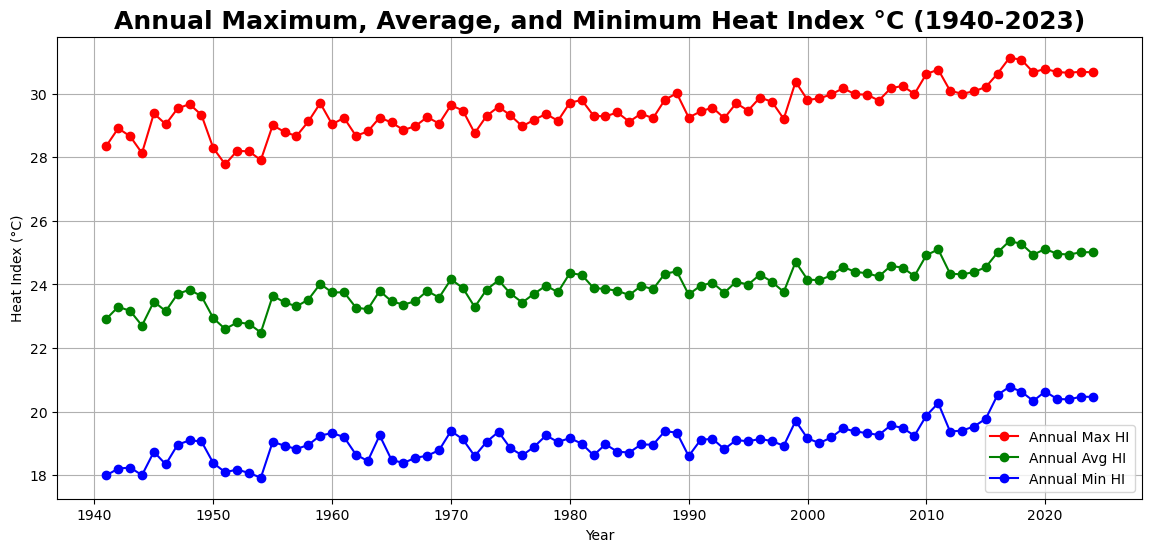

In [47]:
# Compute annual averages for relative humidity
annual_max_HI = HI_daily['daily_max_HI'].resample(time='Y').mean()
annual_avg_HI = HI_daily['daily_avg_HI'].resample(time='Y').mean()
annual_min_HI = HI_daily['daily_min_HI'].resample(time='Y').mean()

# Compute spatial averages for each year
annual_max_HI_avg = annual_max_HI.mean(dim=['latitude', 'longitude'])
annual_avg_HI_avg = annual_avg_HI.mean(dim=['latitude', 'longitude'])
annual_min_HI_avg = annual_min_HI.mean(dim=['latitude', 'longitude'])

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(annual_max_HI['time'], annual_max_HI_avg, label='Annual Max HI', color='red', marker='o')
plt.plot(annual_avg_HI['time'], annual_avg_HI_avg, label='Annual Avg HI', color='green', marker='o')
plt.plot(annual_min_HI['time'], annual_min_HI_avg, label='Annual Min HI', color='blue', marker='o')

plt.title('Annual Maximum, Average, and Minimum Heat Index °C (1940-2023)', fontsize=18, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Heat Index (°C)')
plt.legend()
plt.grid()
plt.show()

3.3.3.3 - Histograms HI

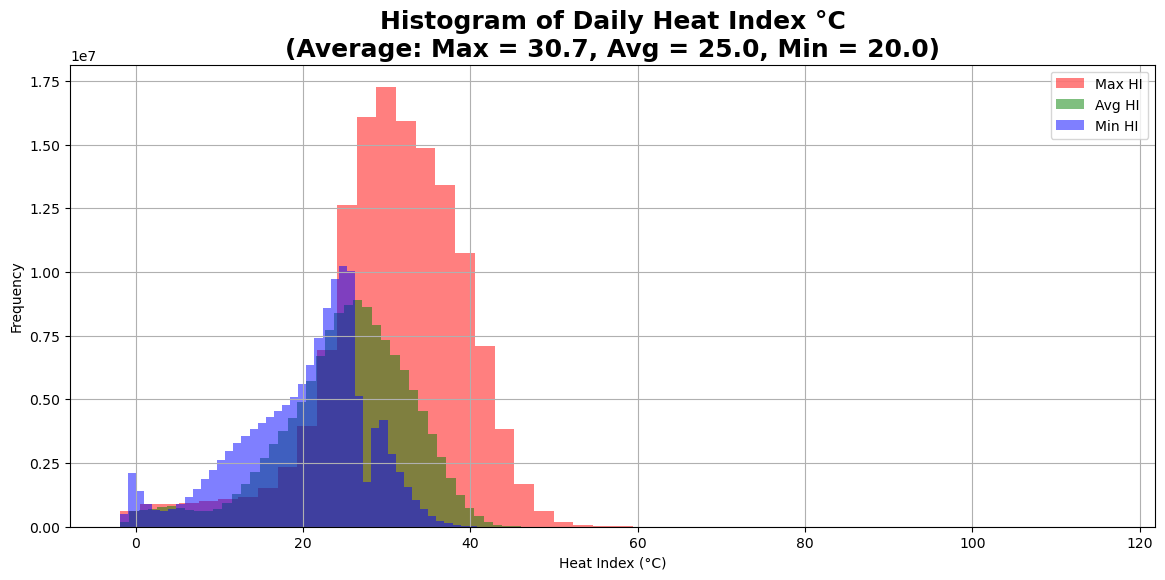

In [48]:
plt.figure(figsize=(14, 6))
HI_daily['daily_max_HI'].plot.hist(bins=50, alpha=0.5, color='red', label='Max HI')
HI_daily['daily_avg_HI'].plot.hist(bins=50, alpha=0.5, color='green', label='Avg HI')
HI_daily['daily_min_HI'].plot.hist(bins=50, alpha=0.5, color='blue', label='Min HI')
plt.title(f"Histogram of Daily Heat Index °C\n(Average: Max = {HI_daily['daily_max_HI'].mean().values:.1f}, "
          f"Avg = {HI_daily['daily_avg_HI'].mean().values:.1f}, "
          f"Min = {HI_daily['daily_min_HI'].mean().values:.1f})", fontsize=18, fontweight='bold')
plt.xlabel('Heat Index (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

3.3.3.4 - Heat Map HI

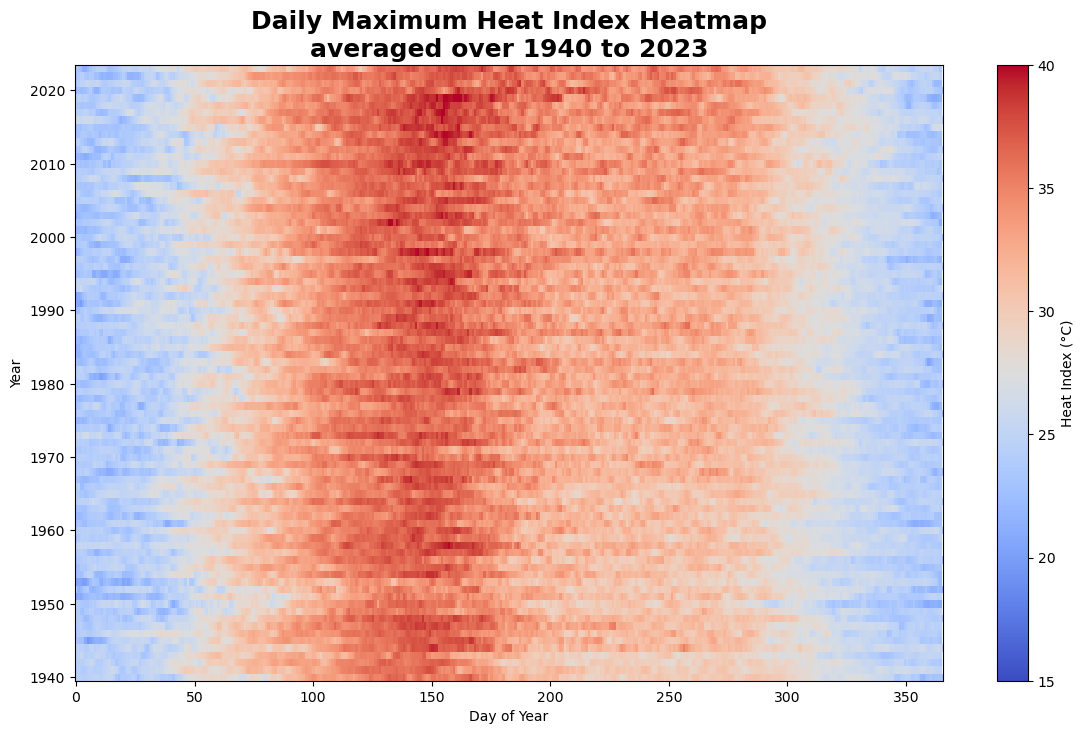

In [49]:
# Compute spatial average over latitude and longitude
daily_avg_HI_spatial = HI_daily['daily_max_HI'].mean(dim=['latitude', 'longitude'])

# Convert to a pandas DataFrame
daily_data_HI = daily_avg_HI_spatial.to_pandas()

# Reshape the data to have years as rows and days as columns
daily_data_HI = daily_data_HI.to_frame(name='daily_max_HI')
daily_data_HI['year'] = daily_data_HI.index.year
daily_data_HI['day_of_year'] = daily_data_HI.index.dayofyear
daily_pivot_HI = daily_data_HI.pivot_table(index='year', columns='day_of_year', values='daily_max_HI')
plt.figure(figsize=(14, 8), facecolor='none')  # Transparent figure background
ax = plt.gca()
ax.set_facecolor('none')  # Transparent axes background

plt.imshow(daily_pivot_HI, aspect='auto', cmap='coolwarm', interpolation='nearest', vmin=15, vmax=40)
plt.colorbar(label='Heat Index (°C)')
plt.title('Daily Maximum Heat Index Heatmap\naveraged over 1940 to 2023', fontsize=18, fontweight='bold')
plt.xlabel('Day of Year')
plt.ylabel('Year')

years = daily_pivot_HI.index
plt.yticks(ticks=range(len(years))[::10], labels=years[::10])

plt.gca().invert_yaxis()
plt.show()

In [50]:
daily_pivot_HI.max().max()

41.1910400390625

In [51]:
daily_pivot_HI.min().min()

19.58749771118164

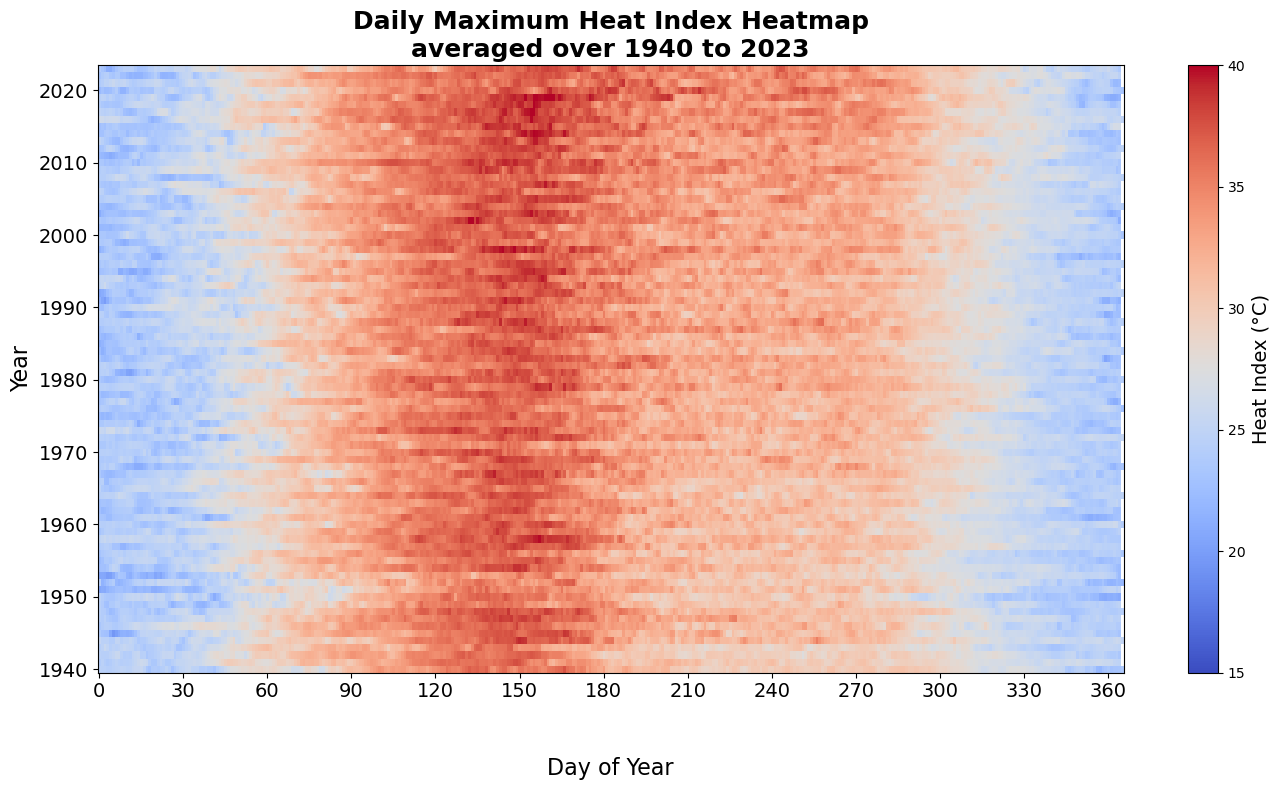

In [52]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 8), facecolor='none')  # Transparent background

# Set axes background to transparent
ax.set_facecolor('none')

# Plot the heatmap
img = ax.imshow(daily_pivot_HI, aspect='auto', cmap='coolwarm',
                interpolation='nearest', vmin=15, vmax=40)

# Add colorbar
cbar = plt.colorbar(img, ax=ax)
cbar.set_label('Heat Index (°C)', fontsize=14)

# Set axis labels
ax.set_title('Daily Maximum Heat Index Heatmap\naveraged over 1940 to 2023', fontsize=18, fontweight='bold')
ax.set_xlabel('Day of Year', fontsize=16, labelpad=40)
ax.set_ylabel('Year', fontsize=16)

# Set ticks
ax.set_xticks(range(0, 366, 30))
ax.set_xticklabels(range(0, 366, 30), fontsize=14)

years = daily_pivot_HI.index
ax.set_yticks(range(len(years))[::10])
ax.set_yticklabels(years[::10], fontsize=14)

# Invert Y-axis (so older years are at the top)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

In [53]:
daily_avg_HI_spatial.max().values

array(41.19104004)

---
3.4 - Seasonal analysis on daily data

3.4.1 - Seasonal cycle and yearly trend on daily average T°C

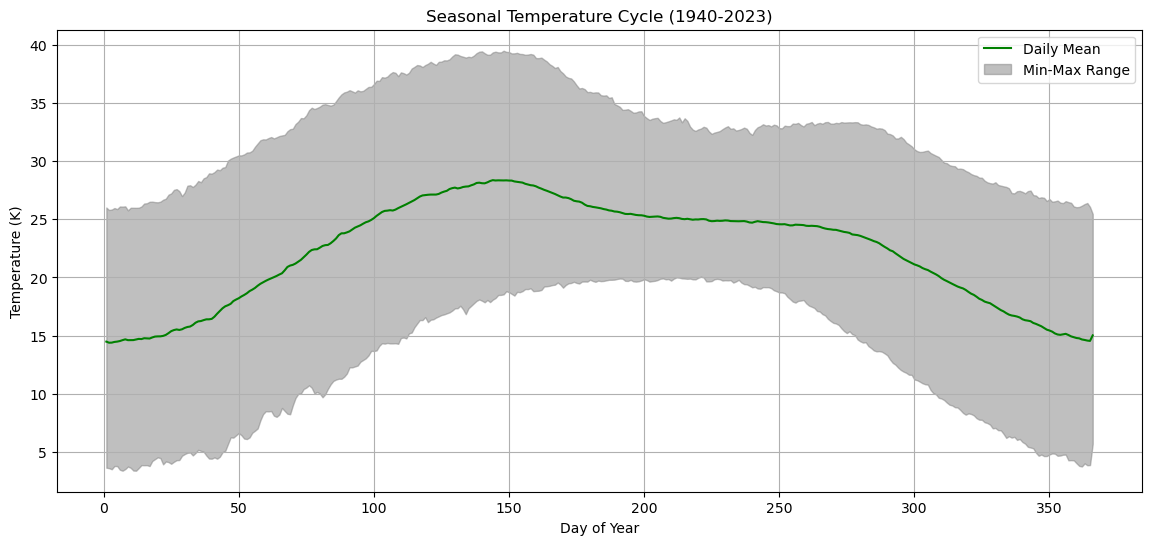

In [ ]:
# Group each temperature variable by day of the year across all years
daily_avg_grouped_T = T_daily['daily_avg_temp'].groupby('time.dayofyear')
daily_min_grouped_T = T_daily['daily_min_temp'].groupby('time.dayofyear')
daily_max_grouped_T = T_daily['daily_max_temp'].groupby('time.dayofyear')

# Compute mean, min, and max for each day of the year, then average over latitude and longitude
seasonal_mean_T = daily_avg_grouped_T.mean(dim='time').mean(dim=['latitude', 'longitude'])
seasonal_min_T = daily_min_grouped_T.min(dim='time').mean(dim=['latitude', 'longitude'])
seasonal_max_T = daily_max_grouped_T.max(dim='time').mean(dim=['latitude', 'longitude'])

# Extract day of year for plotting
days_of_year_T = seasonal_mean_T['dayofyear'].values

# Convert seasonal mean, min, and max to numpy arrays for plotting
seasonal_mean_values_T = seasonal_mean_T.values
seasonal_min_values_T = seasonal_min_T.values
seasonal_max_values_T = seasonal_max_T.values

# Plotting the seasonal cycle with shading
plt.figure(figsize=(14, 6))
plt.plot(days_of_year_T, seasonal_mean_values_T, label='Daily Mean', color='green')
plt.fill_between(days_of_year_T, seasonal_min_values_T, seasonal_max_values_T, color='gray', alpha=0.5, label='Min-Max Range')
plt.title('Seasonal Temperature Cycle on daily average (1940-2023)')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid()
plt.show()

3.4.2 - Seasonal cycle and yearly trend on daily average RH%

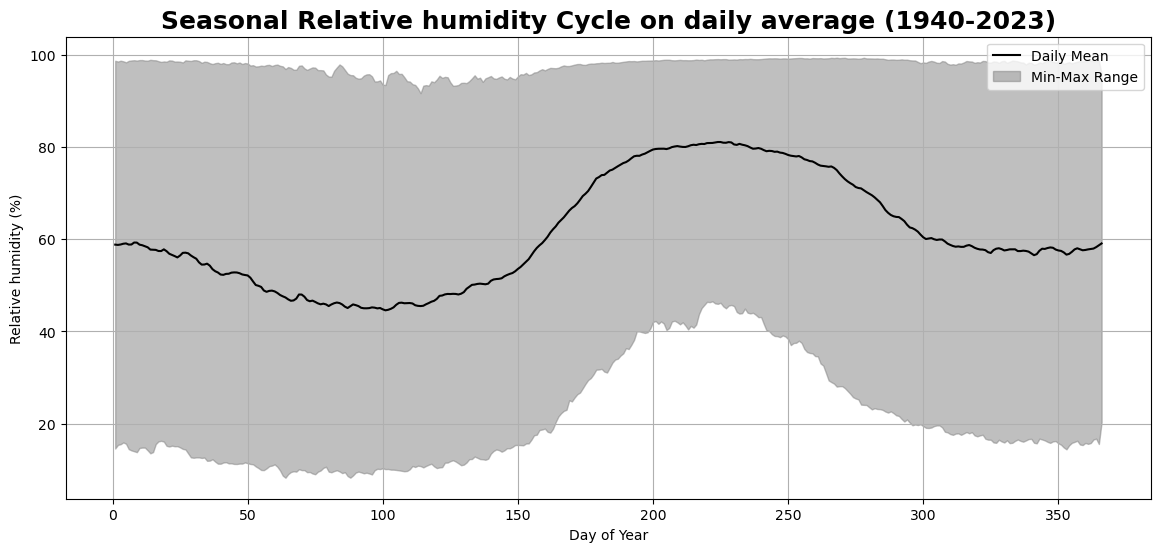

In [51]:
# Group each temperature variable by day of the year across all years
daily_avg_grouped_RH = RH_daily['daily_avg_RH'].groupby('time.dayofyear')
daily_min_grouped_RH = RH_daily['daily_min_RH'].groupby('time.dayofyear')
daily_max_grouped_RH = RH_daily['daily_max_RH'].groupby('time.dayofyear')

# Compute mean, min, and max for each day of the year, then average over latitude and longitude
seasonal_mean_RH = daily_avg_grouped_RH.mean(dim='time').mean(dim=['latitude', 'longitude'])
seasonal_min_RH = daily_min_grouped_RH.min(dim='time').mean(dim=['latitude', 'longitude'])
seasonal_max_RH = daily_max_grouped_RH.max(dim='time').mean(dim=['latitude', 'longitude'])

# Extract day of year for plotting
days_of_year_RH = seasonal_mean_RH['dayofyear'].values

# Convert seasonal mean, min, and max to numpy arrays for plotting
seasonal_mean_values_RH = seasonal_mean_RH.values
seasonal_min_values_RH = seasonal_min_RH.values
seasonal_max_values_RH = seasonal_max_RH.values

# Plotting the seasonal cycle with shading
plt.figure(figsize=(14, 6))
plt.plot(days_of_year_RH, seasonal_mean_values_RH, label='Daily Mean', color='black')
plt.fill_between(days_of_year_RH, seasonal_min_values_RH, seasonal_max_values_RH, color='gray', alpha=0.5, label='Min-Max Range')
plt.title('Seasonal Relative humidity Cycle on daily average (1940-2023)', fontsize=18, fontweight='bold')
plt.xlabel('Day of Year')
plt.ylabel('Relative humidity (%)')
plt.legend()
plt.grid()
plt.show()

3.4.3 -  Seasonal cycle and yearly trend on daily average HI°C

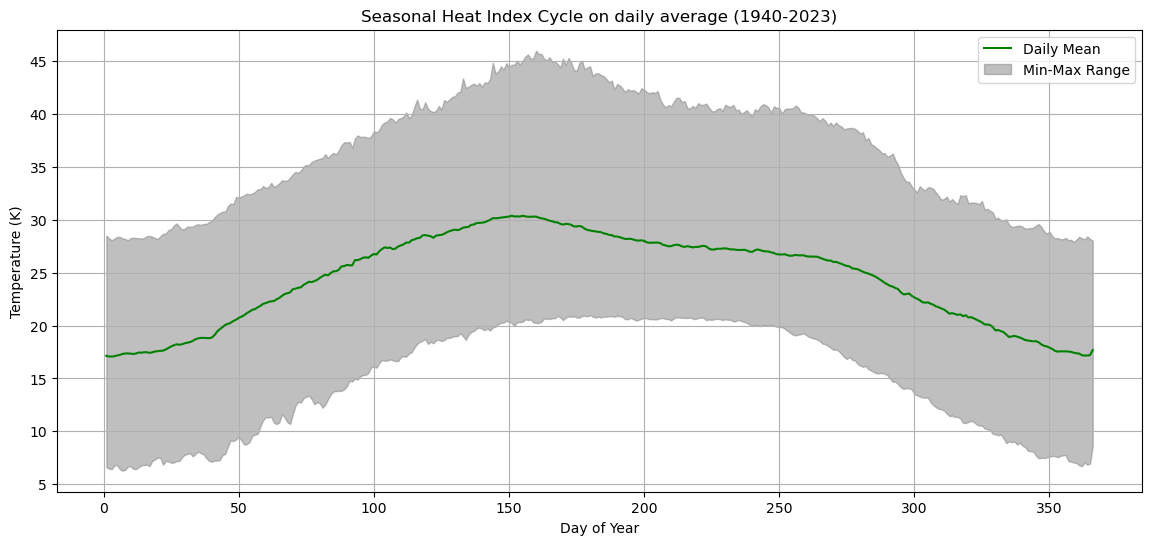

In [54]:
# Group each temperature variable by day of the year across all years
daily_avg_grouped_HI = HI_daily['daily_avg_HI'].groupby('time.dayofyear')
daily_min_grouped_HI = HI_daily['daily_min_HI'].groupby('time.dayofyear')
daily_max_grouped_HI = HI_daily['daily_max_HI'].groupby('time.dayofyear')

# Compute mean, min, and max for each day of the year, then average over latitude and longitude
seasonal_mean_HI = daily_avg_grouped_HI.mean(dim='time').mean(dim=['latitude', 'longitude'])
seasonal_min_HI = daily_min_grouped_HI.min(dim='time').mean(dim=['latitude', 'longitude'])
seasonal_max_HI = daily_max_grouped_HI.max(dim='time').mean(dim=['latitude', 'longitude'])

# Extract day of year for plotting
days_of_year_HI = seasonal_mean_HI['dayofyear'].values

# Convert seasonal mean, min, and max to numpy arrays for plotting
seasonal_mean_values_HI = seasonal_mean_HI.values
seasonal_min_values_HI = seasonal_min_HI.values
seasonal_max_values_HI = seasonal_max_HI.values

# Plotting the seasonal cycle with shading
plt.figure(figsize=(14, 6))
plt.plot(days_of_year_HI, seasonal_mean_values_HI, label='Daily Mean', color='green')
plt.fill_between(days_of_year_HI, seasonal_min_values_HI, seasonal_max_values_HI, color='gray', alpha=0.5, label='Min-Max Range')
plt.title('Seasonal Heat Index Cycle on daily average (1940-2023)')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid()
plt.show()

3.4.4 - Seasons T, RH, and HI

In [8]:
T_daily['daily_min_temp'].min()

<xarray.DataArray 'daily_min_temp' ()>
array(-52.77804565)

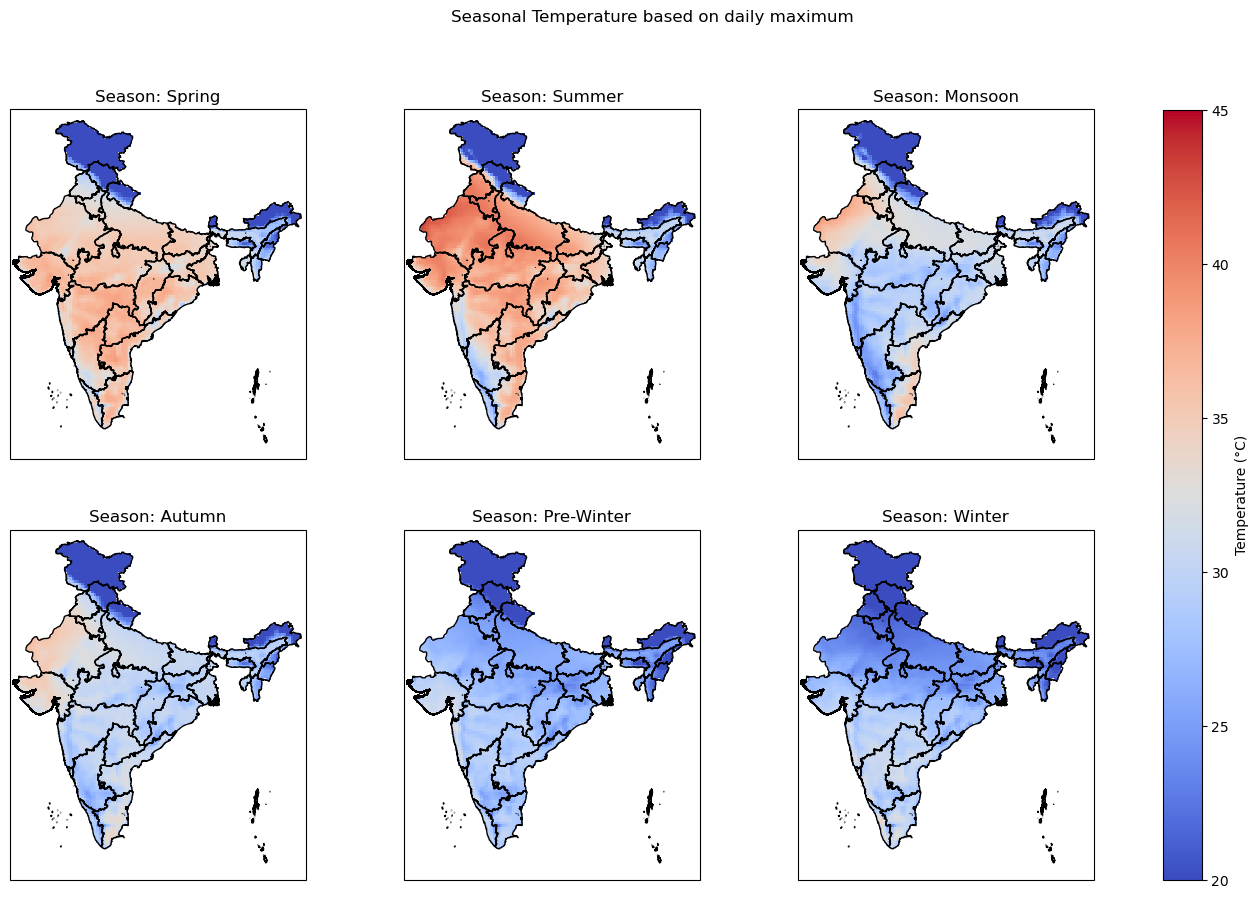

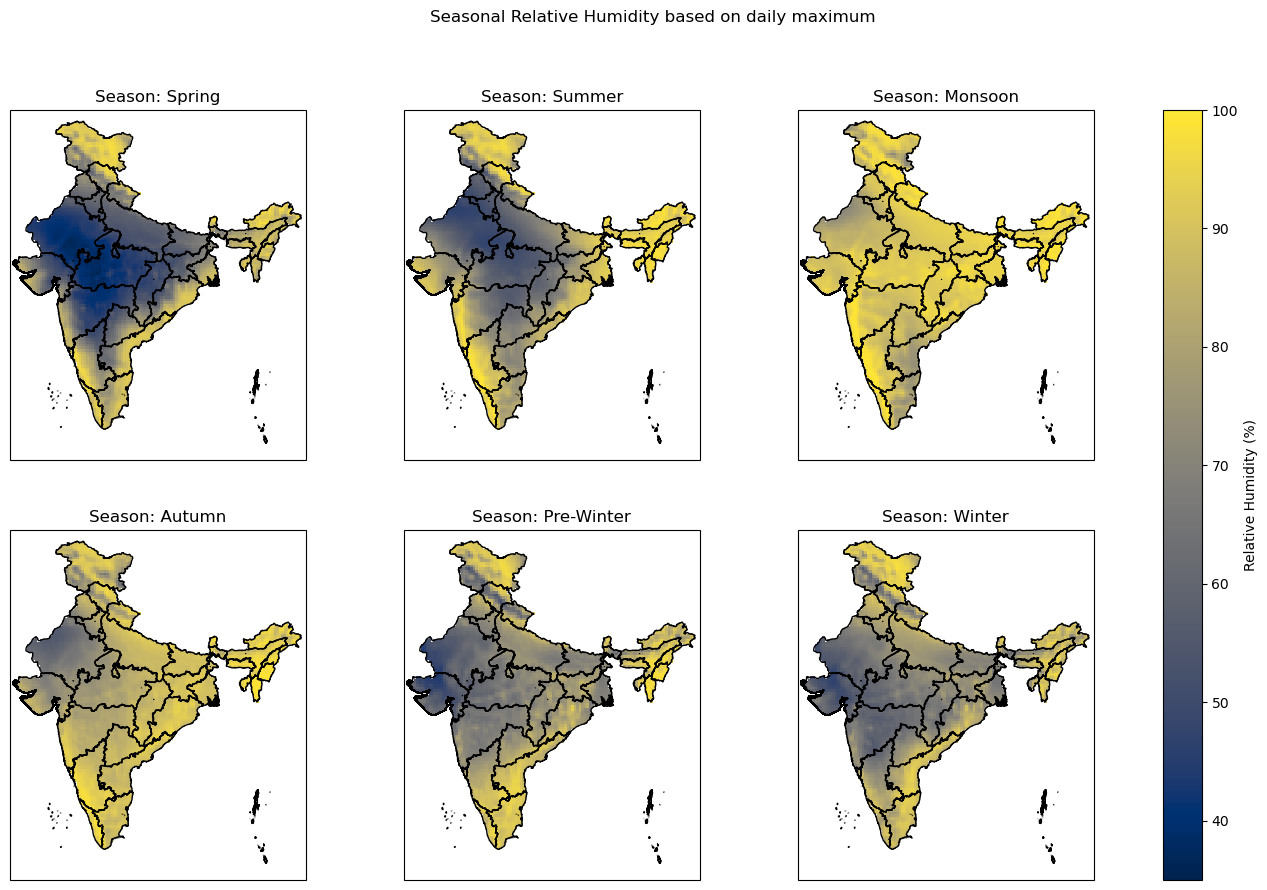

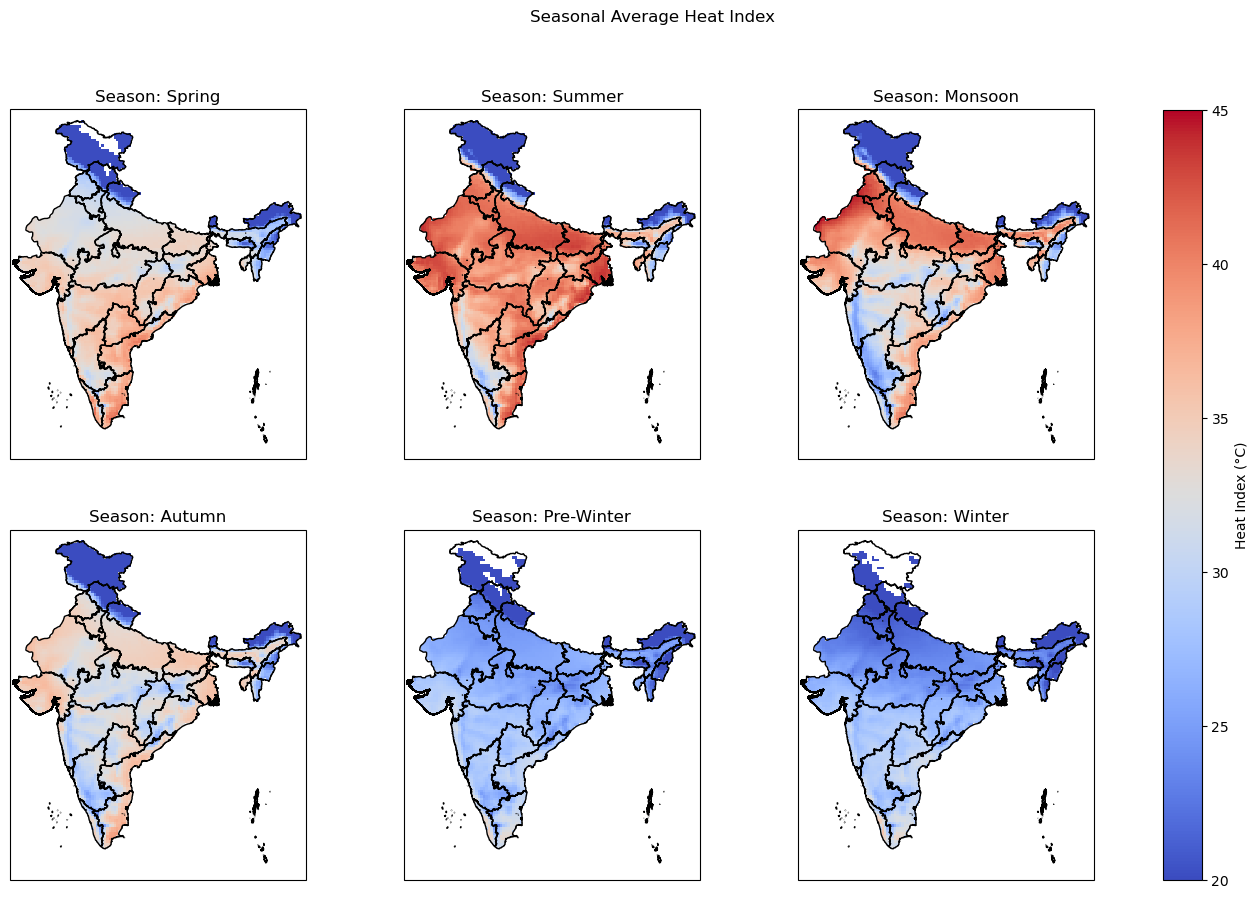

In [ ]:
# Convert time to Pandas DateTimeIndex
time_index = T_daily['time'].to_pandas()

# Define custom seasons function
def assign_season(date):
    month = date.month
    day = date.day
    if (month == 3) or (month == 4):
        return 'Spring'
    elif (month == 5) or (month == 6):
        return 'Summer'
    elif (month == 7) or (month == 8):
        return 'Monsoon'
    elif (month == 9) or (month == 10) or (month == 11 and day <= 15):
        return 'Autumn'
    elif (month == 11 and day > 15) or (month == 12 and day <= 15):
        return 'Pre-Winter'
    else:
        return 'Winter'

# Apply function to assign seasons
season_labels = time_index.map(assign_season)

# Add the season coordinate to datasets
T = T_daily.assign_coords(season=("time", season_labels))
RH  = RH_daily.assign_coords(season=("time", season_labels))
HI = HI_daily.assign_coords(season=("time", season_labels))

# Group by the new season coordinate and compute the mean
seasonal_max_temp = T.groupby('season').mean(dim='time')
seasonal_max_rh = RH.groupby('season').mean(dim='time')
seasonal_max_hi = HI.groupby('season').mean(dim='time')

# Define season order for plotting
season_order = ['Spring', 'Summer', 'Monsoon', 'Autumn', 'Pre-Winter', 'Winter']

# Plot seasonal average temperature
fig_temp, axs_temp = plt.subplots(2, 3, figsize=(18, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axs_temp = axs_temp.flatten()  # Flatten for easy iteration

for i, season in enumerate(season_order):
    if season in seasonal_max_temp['season']:
        ax = axs_temp[i]
        seasonal_max_temp['daily_max_temp'].sel(season=season).plot(ax=ax, cmap='coolwarm', vmin = 20, vmax = 45,  add_colorbar=False)
        ax.set_title(f'Season: {season}')
        # Overlay Indian states on each subplot
        Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Add colorbar
fig_temp.colorbar(axs_temp[0].collections[0], ax=axs_temp, orientation='vertical', label='Temperature (°C)')
plt.suptitle('Seasonal Temperature based on daily maximum')
#plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plot seasonal average relative humidity
fig_rh, axs_rh = plt.subplots(2, 3, figsize=(18, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axs_rh = axs_rh.flatten()

for i, season in enumerate(season_order):
    if season in seasonal_max_rh['season']:
        ax = axs_rh[i]
        seasonal_max_rh['daily_max_RH'].sel(season=season).plot(ax=ax, cmap='cividis', vmin = 35, vmax=100, add_colorbar=False)
        ax.set_title(f'Season: {season}')
        Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Add colorbar
fig_rh.colorbar(axs_rh[0].collections[0], ax=axs_rh, orientation='vertical', label='Relative Humidity (%)')
plt.suptitle('Seasonal Relative Humidity based on daily maximum')
#plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plot seasonal average heat index
fig_hi, axs_hi = plt.subplots(2, 3, figsize=(18, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axs_hi = axs_hi.flatten()  # Flatten for easy iteration

for i, season in enumerate(season_order):
    if season in seasonal_max_hi['season']:
        ax = axs_hi[i]
        seasonal_max_hi['daily_max_HI'].sel(season=season).plot(ax=ax, cmap='coolwarm', vmin = 20, vmax = 45, add_colorbar=False)
        ax.set_title(f'Season: {season}')
        # Overlay Indian states on each subplot
        Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Add colorbar
fig_hi.colorbar(axs_hi[0].collections[0], ax=axs_hi, orientation='vertical', label='Heat Index (°C)')
plt.suptitle('Seasonal Average Heat Index')
#plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [68]:
seasonal_max_temp['daily_max_temp'].max()

<xarray.DataArray 'daily_max_temp' ()>
array(42.9549942)

In [59]:
seasonal_max_hi['daily_max_HI'].max()

<xarray.DataArray 'daily_max_HI' ()>
array(45.58850479)

In [14]:
seasonal_max_rh['daily_max_RH'].min()

<xarray.DataArray 'daily_max_RH' ()>
array(36.23722076)

---
3.5 Linear regression

In [9]:
from sklearn.linear_model import LinearRegression

# Get annual max HI, T, and RH at the HI max location for each year
HI_annual_max = HI_3h['heat_index'].resample(time='Y').mean(dim=['time', 'latitude', 'longitude'])

# For each year, find the location and time of max HI, then extract T and RH at that point
years_hi = HI_annual_max['time.year'].values
annual_max_HI_vals = []
annual_max_T_vals = []
annual_max_RH_vals = []

for year in years_hi:
    # Select data for the year
    hi_year = HI_3h['heat_index'].sel(time=str(year))
    # Find max HI value and its location/time
    max_val = hi_year.max().values
    max_loc = hi_year.where(hi_year == max_val, drop=True)
    # Extract coordinates and time
    lat = float(max_loc.latitude.values)
    lon = float(max_loc.longitude.values)
    t = max_loc['time'].values
    # Save HI, T, RH
    annual_max_HI_vals.append(max_val)
    annual_max_T_vals.append(T_3h['t2m'].sel(time=t, latitude=lat, longitude=lon, method='nearest').values)
    annual_max_RH_vals.append(RH_3h['r'].sel(time=t, latitude=lat, longitude=lon, method='nearest').values)

annual_max_HI_vals = np.array(annual_max_HI_vals)
annual_max_T_vals = np.array(annual_max_T_vals)
annual_max_RH_vals = np.array(annual_max_RH_vals)

# Linear regression

X_years = years_hi.reshape(-1, 1)
model_hi = LinearRegression().fit(X_years, annual_max_HI_vals)
model_t = LinearRegression().fit(X_years, annual_max_T_vals)
model_rh = LinearRegression().fit(X_years, annual_max_RH_vals)

HI_pred = model_hi.predict(X_years)
T_pred = model_t.predict(X_years)
RH_pred = model_rh.predict(X_years)

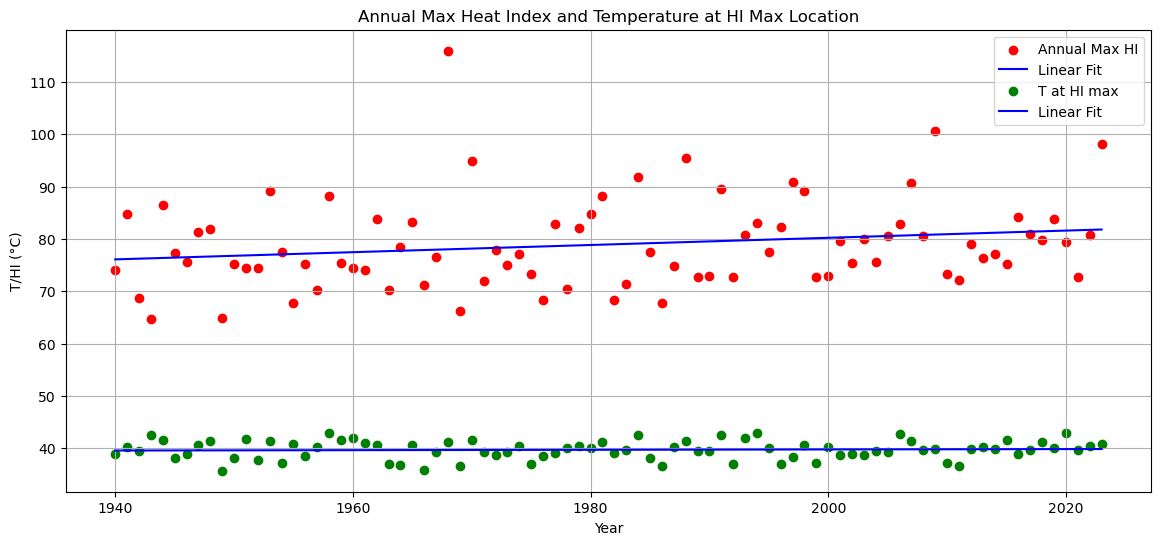

In [10]:
plt.figure(figsize=(14, 6))

plt.scatter(years_hi, annual_max_HI_vals, color='red', label='Annual Max HI')
plt.plot(years_hi, HI_pred, color='blue', label='Linear Fit')
plt.scatter(years_hi, annual_max_T_vals, color='green', label='T at HI max')
plt.plot(years_hi, T_pred, color='blue', label='Linear Fit')
plt.xlabel('Year')
plt.ylabel('T/HI (°C)')
plt.title('Annual Max Heat Index and Temperature at HI Max Location')
plt.legend()

plt.grid()
plt.show()


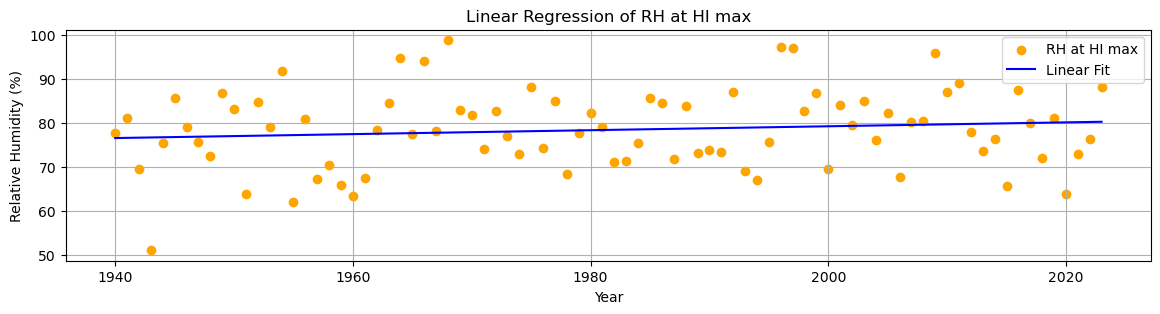

In [64]:
plt.figure(figsize=(14, 3))
plt.scatter(years_hi, annual_max_RH_vals, color='orange', label='RH at HI max')
plt.plot(years_hi, RH_pred, color='blue', label='Linear Fit')
plt.title('Linear Regression of RH at HI max')
plt.xlabel('Year')
plt.ylabel('Relative Humidity (%)')
plt.legend()

plt.grid()
plt.show()

---
3.6 - Pixel analysis

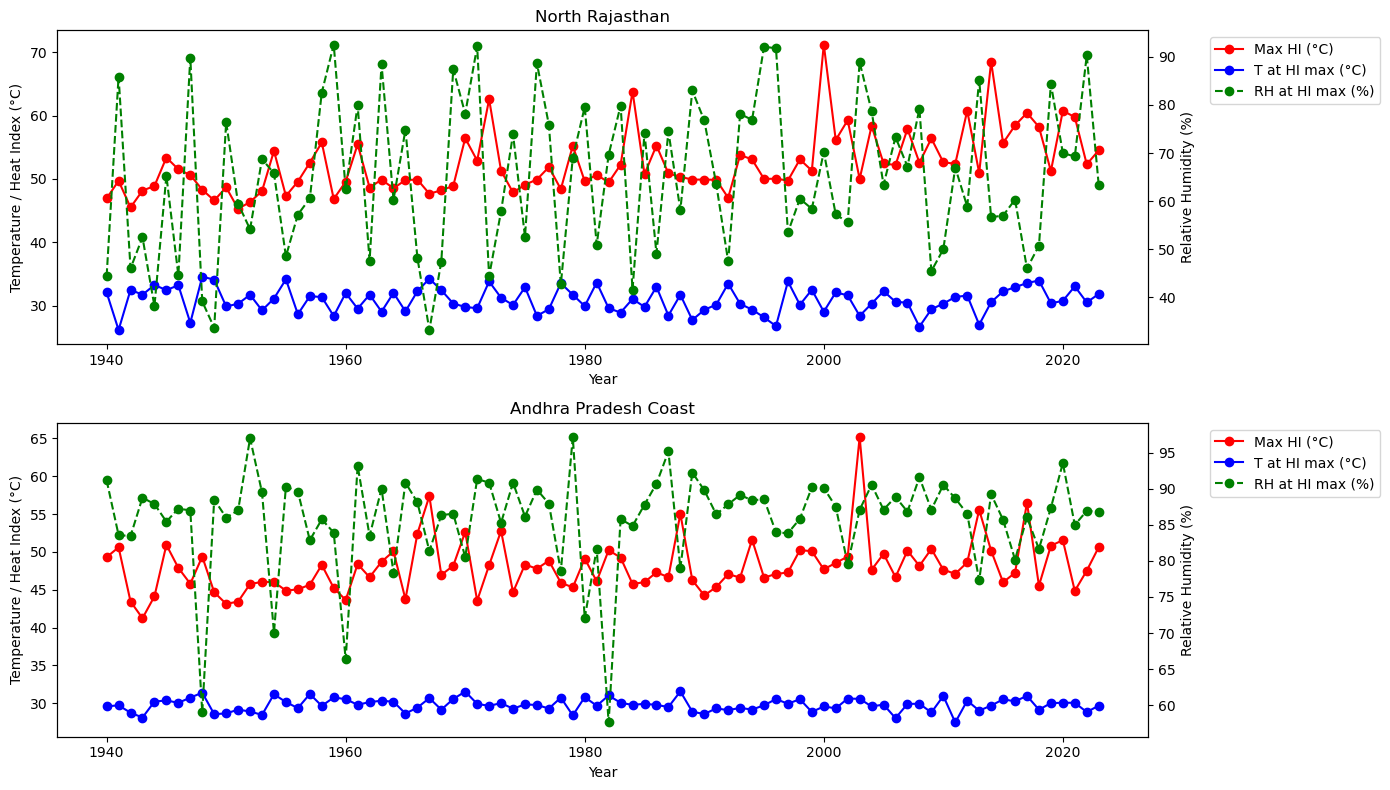

In [ ]:
# Extract pixel coordinates
coords = {
    'North Rajasthan': {'lat': 28.5, 'lon': 74.5},
    'Andhra Pradesh Coast': {'lat': 16.5, 'lon': 82.0}
}

fig, axs = plt.subplots(2, 1, figsize=(14, 8), sharey=False)

for idx, (region, loc) in enumerate(coords.items()):
    # Extract daily max HI series for the pixel
    hi_series = HI_daily['daily_max_HI'].sel(latitude=loc['lat'], longitude=loc['lon'])
    years = hi_series['time.year'].values
    hi_annual = hi_series.groupby('time.year').max()
    years = hi_annual['year'].values

    # For each year, find the date of max HI, then get T and RH at that date from 3h dataset
    t_corr = []
    rh_corr = []
    for year in years:
        # Get all days in this year
        hi_year = hi_series.sel(time=str(year))
        # Find the day with max HI
        max_idx = hi_year.argmax(dim='time').item()
        max_date = hi_year['time'].isel(time=max_idx).values

        # Find the 3-hourly time with max HI on that day
        hi_3h_day = HI_3h['heat_index'].sel(latitude=loc['lat'], longitude=loc['lon'], time=str(max_date))
        if hi_3h_day.size > 1:
            max_3h_idx = hi_3h_day.argmax(dim='time').item()
            max_3h_time = hi_3h_day['time'].isel(time=max_3h_idx).values
        else:
            max_3h_time = hi_3h_day['time'].values

        # Get corresponding T and RH at that 3-hourly time
        t_val = T_3h['t2m'].sel(latitude=loc['lat'], longitude=loc['lon'], time=max_3h_time).values.item()
        rh_val = RH_3h['r'].sel(latitude=loc['lat'], longitude=loc['lon'], time=max_3h_time).values.item()
        t_corr.append(t_val)
        rh_corr.append(rh_val)

    ax = axs[idx]
    ax2 = ax.twinx()

    # Plot HI and corresponding T, RH
    ax.plot(years, hi_annual.values, color='red', label='Max HI (°C)', linestyle='-', marker='o')
    ax.plot(years, t_corr, color='blue', label='T at HI max (°C)', linestyle='-', marker='o')
    ax.set_ylabel('Temperature / Heat Index (°C)')
    ax.set_xlabel('Year')
    ax.set_title(region)
    ax.tick_params(axis='y')

    ax2.plot(years, rh_corr, color='green', label='RH at HI max (%)', linestyle='--', marker='o')
    ax2.set_ylabel('Relative Humidity (%)')
    ax2.tick_params(axis='y')

    # Legends
    lines, labels = ax.get_legend_handles_labels()  
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, 
             bbox_to_anchor=(1.05, 1),  # Place legend outside
             loc='upper left')


plt.tight_layout()
plt.show()  

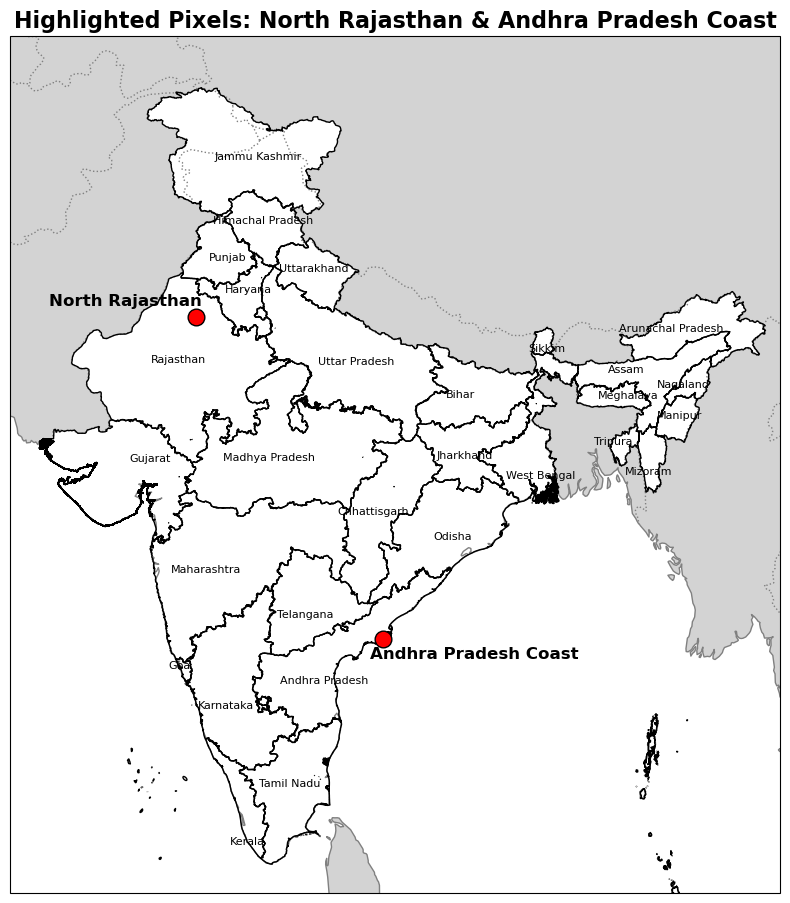

In [46]:
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add global land features first (this will be light gray)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')

# Add India with white background
Indian_states.plot(ax=ax, facecolor='white', edgecolor='none')

# Plot city points and labels
for _, row in capitals_df.iterrows():
    ax.text(row["Longitude"], row["Latitude"], row["State"],
            transform=ccrs.PlateCarree(), fontsize=8, color='black',
            horizontalalignment='center', verticalalignment='center', zorder=10)

# Plot Indian state boundaries on top
Indian_states.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Highlight the two pixels
for name, loc in coords.items():
    ax.plot(loc['lon'], loc['lat'], marker='o', markersize=12, color='red', 
            markeredgecolor='black', zorder=10)
    # Different text positioning for each location
    if name == 'North Rajasthan':
        ax.text(loc['lon']+0.2, loc['lat']+0.6, name, fontsize=12, color='black', 
                weight='bold', va='center', ha='right', zorder=11)
    else:  # Andhra Pradesh Coast
        ax.text(loc['lon']-0.5, loc['lat'] - 0.6, name, fontsize=12, color='black', 
                weight='bold', va='center', zorder=11)

ax.set_xlim(67, 98)
ax.set_ylim(7, 39)
plt.title('Highlighted Pixels: North Rajasthan & Andhra Pradesh Coast', 
          fontsize=16, fontweight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()